In [4]:
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [6]:
!pip install fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


In [7]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


# Análisis de nulos
import missingno as msno

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from fuzzywuzzy import process
import re

In [8]:
from funciones_auxiliares_done import *

In [10]:
#Creacion de el df en base al archivo poverty_explorer.csv
df_pobreza = pd.read_csv('poverty_explorer.csv')


In [11]:
#Exploracion inicial
df_pobreza.head(10)

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.897420,99.951650,...,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.948130,99.762024,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.405670,98.857360,99.546940,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110
3,Albania,2008,0.000000,0.199925,3.902613,33.431850,62.768870,94.582830,98.509230,99.344450,...,11.974607,14.590684,24.551666,29.854542,45.687150,1.114657,4.395911,3.574216,1.957677,1.825743
4,Albania,2012,0.024101,0.620691,4.805442,36.667750,65.062386,95.520160,99.073530,99.742485,...,11.699819,14.170336,21.827140,30.110823,46.954838,1.041193,4.272574,3.630154,1.942752,1.868563
5,Albania,2014,0.000000,1.023101,9.675968,38.743828,60.978160,91.585050,98.098880,99.505390,...,12.904348,16.358868,25.905287,26.073656,48.382023,1.376215,5.930923,5.188477,2.297305,2.258506
6,Albania,2015,0.000000,0.120621,3.698998,26.154316,50.618790,86.814410,96.229960,98.854910,...,15.097300,19.131746,29.872381,27.467186,47.753506,1.248506,5.278242,4.604914,2.231382,2.063705
7,Albania,2016,0.000000,0.139303,4.666635,25.413830,48.276623,84.987495,95.694770,98.504710,...,15.932185,20.239770,31.414880,26.690538,48.259907,1.306971,5.626880,4.925413,2.253247,2.185918
8,Albania,2017,0.000000,0.392570,3.626682,25.540997,48.670470,85.177600,96.033440,98.868710,...,15.784447,19.958294,30.547024,27.141174,48.246395,1.259837,5.389502,4.632188,2.230318,2.076918
9,Albania,2018,0.000000,0.048107,2.730375,18.160960,39.372112,83.799930,96.276825,99.001250,...,16.774992,20.573345,30.284817,29.118465,48.139220,1.083829,4.811264,4.258914,2.003731,2.125492


In [12]:
df_pobreza.tail(10)

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
2592,Zambia,1996,14.739539,46.773384,69.849950,88.802216,94.539320,98.755950,99.581820,99.797380,...,4.226757,5.895869,13.509895,18.525295,44.144800,2.916805,11.942079,8.650664,3.122900,2.770074
2593,Zambia,1998,15.859580,47.225610,70.471560,89.302230,94.683730,98.743910,99.488760,99.724140,...,4.145590,5.746170,13.675133,18.169554,43.670690,3.065068,12.562497,8.694422,3.117214,2.789165
2594,Zambia,2002,14.305808,56.388855,81.437830,94.960180,97.718376,99.523254,99.787964,99.872260,...,3.131528,4.125965,9.214282,22.822874,43.456562,2.067986,7.972350,5.707286,2.556077,2.232830
2595,Zambia,2004,30.160358,61.062454,78.635260,91.888626,95.797850,98.934870,99.593216,99.809180,...,3.245082,4.745639,12.418082,15.328490,42.003586,4.093980,16.617987,11.373968,3.726246,3.052393
2596,Zambia,2006,33.916065,64.698030,81.165276,92.573340,96.002130,99.070190,99.672060,99.835040,...,2.954823,4.369609,11.565938,15.193801,41.644337,4.177633,16.776688,11.427793,3.842840,2.973788
2597,Zambia,2010,30.247530,64.401900,80.831720,92.508110,96.168530,99.148600,99.770030,99.913720,...,2.996503,4.410545,10.996644,16.714405,42.250683,3.557960,14.113775,10.120482,3.682800,2.748041
2598,Zambia,2015,32.625584,60.793095,78.000960,91.015350,95.331520,98.915600,99.545610,99.777664,...,3.320157,5.007214,12.925020,14.151038,42.394980,4.619834,19.600744,13.158383,3.942967,3.337178
2599,Zimbabwe,2011,0.351729,21.580063,47.857143,77.945114,88.905320,97.352370,98.956210,99.509186,...,6.381797,8.645355,18.470837,21.667973,44.501904,2.207938,8.526847,6.642927,2.776870,2.392235
2600,Zimbabwe,2017,2.398895,34.206043,61.583572,84.109024,92.461220,98.468330,99.412650,99.762436,...,5.137737,7.188726,15.347464,21.040699,44.151520,2.307360,8.569543,6.556821,3.066078,2.138504
2601,Zimbabwe,2019,7.359053,39.754530,64.509860,85.016320,91.423780,97.476456,98.799060,99.511925,...,4.890649,7.018182,18.282276,18.039312,41.335136,3.199699,11.806920,8.212260,3.402409,2.413660


In [14]:
df_pobreza.columns

Index(['Country', 'Year', 'Share below $1 a day', 'Share below $2.15 a day',
       'Share below $3.65 a day', 'Share below $6.85 a day',
       'Share below $10 a day', 'Share below $20 a day',
       'Share below $30 a day', 'Share below $40 a day',
       ...
       'decile8_avg', 'decile9_avg', 'decile10_avg', 'bottom50_share',
       'middle40_share', 'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio',
       'p90_p50_ratio', 'p50_p10_ratio'],
      dtype='object', length=109)

In [15]:
columnas_array = np.array(df_pobreza.columns)
len(columnas_array)

109

In [16]:
columnas_array

array(['Country', 'Year', 'Share below $1 a day',
       'Share below $2.15 a day', 'Share below $3.65 a day',
       'Share below $6.85 a day', 'Share below $10 a day',
       'Share below $20 a day', 'Share below $30 a day',
       'Share below $40 a day', 'Number below $1 a day',
       'Number below $2.15 a day', 'Number below $3.65 a day',
       'Number below $6.85 a day', 'Number below $10 a day',
       'Number below $20 a day', 'Number below $30 a day',
       'Number below $40 a day',
       '40% of median - share of population below poverty line',
       '50% of median - share of population below poverty line',
       '60% of median - share of population below poverty line',
       '40% of median - total number of people below poverty line',
       '50% of median - total number of people below poverty line',
       '60% of median - total number of people below poverty line',
       'Mean income or consumption per day',
       'Median income or consumption per day',
       'T

# Tabla de Variables del Dataset Poverty Explorer - Our World in Data

## Variables de Identificación y Metodología

| Variable | Descripción |
|----------|-------------|
| **country** | The name of the country to which the row relates. It can be: 1) Countries, whose names have been standardized to a common set of country names used across Our World in Data 2) Regional aggregates provided as standard within the PIP data according to World Bank region definitions. |
| **year** | The following description is adapted from PIP Methodology Handbook: Within the PIP data, observations are allocated two different year variables: Year and Survey Year. If all fieldwork for a survey took place during one calendar year, and relate to the consumption or income of that year, Year and Survey year are both equal to this calendar year. When household surveys span two calendar years, the Survey year noted in the PIP data is not an integer. The Gambia, for example, has a Survey year of 2015.31. This means that 69% of the fieldwork for this particular survey took place in 2015 while 31% of the fieldwork months took place in 2016. In these cases, Year is the floor of Survey year (i.e. Survey year always rounded down). |
| **reporting_level** | The reporting level of the survey. It can be national, urban or rural. |
| **welfare_type** | Indicates whether the survey data relates to household income or consumption expenditure. |
| **ppp_version** | The version of the Purchasing Power Parity (PPP), which are conversions into international-$ to adjust for inflation and for differences in the cost of living between countries. It can be 2011 or 2017. |
| **survey_year** | The following description is adapted from PIP Methodology Handbook: Within the PIP data, observations are allocated two different year variables: Year and Survey Year. If all fieldwork for a survey took place during one calendar year, and relate to the consumption or income of that year, Year and Survey year are both equal to this calendar year. When household surveys span two calendar years, the Survey year noted in the PIP data is not an integer. The Gambia, for example, has a Survey year of 2015.31. This means that 69% of the fieldwork for this particular survey took place in 2015 while 31% of the fieldwork months took place in 2016. In these cases, Year is the floor of Survey year (i.e. Survey year always rounded down). This Survey year variable is used by the World Bank for the purposes of 'lining up' the different country-level estimates in order to calculate regional aggregates. |
| **survey_comparability** | A variable produced by the World Bank that codes more comparable spells of survey data over time within individual countries. A change in the spell group number indicates a break in survey comparability. The following description is adapted from PIP Methodology Handbook: As countries frequently improve the questionnaire design of household surveys and the methodology for the construction of welfare aggregates, poverty estimates over time for a country are not always comparable to each other. In order to guide users about when poverty can be compared over time within a country, [the PIP database includes a 'Comparability over time' variable]. Within a country, comparability of poverty estimates over time is assumed unless there is a known change to the survey instrument, survey methodology, measurement, or data structure. The assessment of comparability is country-dependent and relies on the accumulation of knowledge from past and current World Bank staff, as well as close dialogue with national data producers with knowledge of survey design and methodology. The complete documentation of this dataset is available in Atamanov et al. (2019). |

## Variables de Pobreza Absoluta - Proporción de Población (Headcount Ratios)

| Variable | Descripción |
|----------|-------------|
| **headcount_ratio_international_povline** | % of population living in households with an income or expenditure per person below the International Poverty Line: $1.90 a day (in 2011 prices) or $2.15 a day (in 2017 prices). |
| **headcount_ratio_lower_mid_income_povline** | % of population living in households with an income or expenditure per person below the lower-middle income poverty line: $3.20 a day (in 2011 prices) or $3.65 a day (in 2017 prices). |
| **headcount_ratio_upper_mid_income_povline** | % of population living in households with an income or expenditure per person below the upper-middle income poverty line: $5.50 a day (in 2011 prices) or $6.85 a day (in 2017 prices). |
| **headcount_ratio_100** | % of population living in households with an income or expenditure per person below $1 a day. |
| **headcount_ratio_1000** | % of population living in households with an income or expenditure per person below $10 a day. |
| **headcount_ratio_2000** | % of population living in households with an income or expenditure per person below $20 a day. |
| **headcount_ratio_3000** | % of population living in households with an income or expenditure per person below $30 a day. |
| **headcount_ratio_4000** | % of population living in households with an income or expenditure per person below $40 a day. |

## Variables de Pobreza Relativa - Proporción de Población

| Variable | Descripción |
|----------|-------------|
| **headcount_ratio_40_median** | % of population living in households with an income or expenditure per person below 40% of the median. |
| **headcount_ratio_50_median** | % of population living in households with an income or expenditure per person below 50% of the median. |
| **headcount_ratio_60_median** | % of population living in households with an income or expenditure per person below 60% of the median. |

## Variables de Pobreza Absoluta - Número de Personas

| Variable | Descripción |
|----------|-------------|
| **headcount_international_povline** | Number of people living in households with an income or expenditure per person below the International Poverty Line: $1.90 a day (in 2011 prices) or $2.15 a day (in 2017 prices). |
| **headcount_lower_mid_income_povline** | Number of people living in households with an income or expenditure per person below the lower-middle income poverty line: $3.20 a day (in 2011 prices) or $3.65 a day (in 2017 prices). |
| **headcount_upper_mid_income_povline** | Number of people living in households with an income or expenditure per person below the upper-middle income poverty line: $5.50 a day (in 2011 prices) or $6.85 a day (in 2017 prices). |
| **headcount_100** | Number of people living in households with an income or expenditure per person below $1 a day. |
| **headcount_1000** | Number of people living in households with an income or expenditure per person below $10 a day. |
| **headcount_2000** | Number of people living in households with an income or expenditure per person below $20 a day. |
| **headcount_3000** | Number of people living in households with an income or expenditure per person below $30 a day. |
| **headcount_4000** | Number of people living in households with an income or expenditure per person below $40 a day. |

## Variables de Pobreza Relativa - Número de Personas

| Variable | Descripción |
|----------|-------------|
| **headcount_40_median** | Number of people living in households with an income or expenditure per person below 40% of the median. |
| **headcount_50_median** | Number of people living in households with an income or expenditure per person below 50% of the median. |
| **headcount_60_median** | Number of people living in households with an income or expenditure per person below 60% of the median. |

## Variables de Déficit Promedio (Average Shortfall)

| Variable | Descripción |
|----------|-------------|
| **avg_shortfall_international_povline** | The average shortfall from the International Poverty Line per day (averaged across the population in poverty). The International Poverty Line is $1.90 a day (in 2011 prices) or $2.15 a day (in 2017 prices). |
| **avg_shortfall_lower_mid_income_povline** | The average shortfall from the lower-middle income poverty line (averaged across the population in poverty). The lower-middle income poverty line is $3.20 a day (in 2011 prices) or $3.65 a day (in 2017 prices). |
| **avg_shortfall_upper_mid_income_povline** | The average shortfall from the upper-middle income poverty line (averaged across the population in poverty). The upper-middle poverty line is $5.50 a day (in 2011 prices) or $6.85 a day (in 2017 prices). |
| **avg_shortfall_100** | The average shortfall from the poverty line of $1 per day (averaged across the population in poverty). |
| **avg_shortfall_1000** | The average shortfall from the poverty line of $10 per day (averaged across the population in poverty). |
| **avg_shortfall_2000** | The average shortfall from the poverty line of $20 per day (averaged across the population in poverty). |
| **avg_shortfall_3000** | The average shortfall from the poverty line of $30 per day (averaged across the population in poverty). |
| **avg_shortfall_4000** | The average shortfall from the poverty line of $40 per day (averaged across the population in poverty). |
| **avg_shortfall_40_median** | The average shortfall from a poverty line of the 40% of the median income or expenditure (averaged across the population in poverty). |
| **avg_shortfall_50_median** | The average shortfall from a poverty line of the 50% of the median income or expenditure (averaged across the population in poverty). |
| **avg_shortfall_60_median** | The average shortfall from a poverty line of the 60% of the median income or expenditure (averaged across the population in poverty). |

## Variables de Déficit Total (Total Shortfall)

| Variable | Descripción |
|----------|-------------|
| **total_shortfall_international_povline** | The total shortfall from the International Poverty Line: $1.90 a day (in 2011 prices) or $2.15 a day (in 2017 prices). This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_lower_mid_income_povline** | The total shortfall from the lower-middle income poverty line: $3.20 a day (in 2011 prices) or $3.65 a day (in 2017 prices). This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_upper_mid_income_povline** | The total shortfall from the upper-middle income poverty line: $5.50 a day (in 2011 prices) or $6.85 a day (in 2017 prices). This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_100** | The total shortfall from a poverty line of $1 a day. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_1000** | The total shortfall from a poverty line of $10 a day. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_2000** | The total shortfall from a poverty line of $20 a day. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_3000** | The total shortfall from a poverty line of $30 a day. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_4000** | The total shortfall from a poverty line of $40 a day. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_40_median** | The total shortfall from a poverty line of the 40% of the median income or expenditure. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_50_median** | The total shortfall from a poverty line of the 50% of the median income or expenditure. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |
| **total_shortfall_60_median** | The total shortfall from a poverty line of the 60% of the median income or expenditure. This is the amount of money that would be theoretically needed to lift the incomes or expenditure of all people in poverty up to the poverty line. However this is not a measure of the actual cost of eliminating poverty, since it does not take into account the costs involved in making the necessary transfers nor any changes in behaviour they would bring about. |

## Variables de Brecha de Ingreso (Income Gap Ratio)

| Variable | Descripción |
|----------|-------------|
| **income_gap_ratio_international_povline** | The average shortfall from the International Poverty Line (averaged across the population in poverty) expressed as a share of the poverty line. The International Poverty Line is $1.90 a day (in 2011 prices) or $2.15 a day (in 2017 prices). This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_lower_mid_income_povline** | The average shortfall from the lower-middle income poverty line (averaged across the population in poverty) expressed as a share of the poverty line. The lower-middle income poverty line is $3.20 a day (in 2011 prices) or $3.65 a day (in 2017 prices). This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_upper_mid_income_povline** | The average shortfall from the upper-middle income poverty line (averaged across the population in poverty) expressed as a share of the poverty line. The upper-middle income poverty line is $5.50 a day (in 2011 prices) or $6.85 a day (in 2017 prices). This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_100** | The average shortfall from a poverty line of $1 a day (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_1000** | The average shortfall from a poverty line of $10 a day (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_2000** | The average shortfall from a poverty line of $20 a day (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_3000** | The average shortfall from a poverty line of $30 a day (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_4000** | The average shortfall from a poverty line of $40 a day (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_40_median** | The average shortfall from a poverty line of the 40% of the median income or expenditure (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_50_median** | The average shortfall from a poverty line of the 50% of the median income or expenditure (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |
| **income_gap_ratio_60_median** | The average shortfall from a poverty line of the 60% of the median income or expenditure (averaged across the population in poverty) expressed as a share of the poverty line. This metric is sometimes called the 'income gap ratio'. It captures the depth of poverty in which those below the poverty line are living. |

## Variables de Índice de Brecha de Pobreza (Poverty Gap Index)

| Variable | Descripción |
|----------|-------------|
| **poverty_gap_index_international_povline** | The poverty gap index calculated at the International Poverty Line: $1.90 a day (in 2011 prices) or $2.15 a day (in 2017 prices). The poverty gap index is a measure that reflects both the depth and prevalence of poverty. It is defined as the mean shortfall of the total population from the poverty line counting the non-poor as having zero shortfall and expressed as a percentage of the poverty line. For those below the poverty line, the shortfall corresponds to the amount of money required in order to reach the poverty line. For those at or above the poverty line, the shortfall is counted as zero. The average shortfall is then calculated across the total population – both poor and non-poor – and then expressed as a share of the poverty line. Unlike the more commonly-used metric of the headcount ratio, the poverty gap index is thus sensitive not only to whether a person's income falls below the poverty line or not, but also by how much – i.e. to the depth of poverty they experience. |
| **poverty_gap_index_lower_mid_income_povline** | The poverty gap index calculated at the lower-middle income poverty line: $3.20 a day (in 2011 prices) or $3.65 a day (in 2017 prices) a day. The poverty gap index is a measure that reflects both the depth and prevalence of poverty. It is defined as the mean shortfall of the total population from the poverty line counting the non-poor as having zero shortfall and expressed as a percentage of the poverty line. |
| **poverty_gap_index_upper_mid_income_povline** | The poverty gap index calculated at the upper-middle income poverty line: $5.50 a day (in 2011 prices) or $6.85 a day (in 2017 prices). The poverty gap index is a measure that reflects both the depth and prevalence of poverty. It is defined as the mean shortfall of the total population from the poverty line counting the non-poor as having zero shortfall and expressed as a percentage of the poverty line. |
| **poverty_gap_index_100** | The poverty gap index calculated at a poverty line of $1 a day. The poverty gap index is a measure that reflects both the depth and prevalence of poverty. |
| **poverty_gap_index_1000** | The poverty gap index calculated at a poverty line of $10 a day. The poverty gap index is a measure that reflects both the depth and prevalence of poverty. |
| **poverty_gap_index_2000** | The poverty gap index calculated at a poverty line of $20 a day. The poverty gap index is a measure that reflects both the depth and prevalence of poverty. |
| **poverty_gap_index_3000** | The poverty gap index calculated at a poverty line of $30 a day. The poverty gap index is a measure that reflects both the depth and prevalence of poverty. |
| **poverty_gap_index_4000** | The poverty gap index calculated at a poverty line of $40 a day. The poverty gap index is a measure that reflects both the depth and prevalence of poverty. |

## Variables de Distribución de Ingreso

| Variable | Descripción |
|----------|-------------|
| **mean** | The mean level of income or expenditure per day. |
| **median** | The level of income or expenditure per day below which half of the population live. |

## Variables de Ingreso Promedio por Decil

| Variable | Descripción |
|----------|-------------|
| **decile1_avg** | The mean income or expenditure per day within the poorest decile (tenth of the population). |
| **decile2_avg** | The mean income or expenditure per day within the 2nd decile (tenth of the population). |
| **decile3_avg** | The mean income or expenditure per day within the 3rd decile (tenth of the population). |
| **decile4_avg** | The mean income or expenditure per day within the 4th decile (tenth of the population). |
| **decile5_avg** | The mean income or expenditure per day within the 5th decile (tenth of the population). |
| **decile6_avg** | The mean income or expenditure per day within the 6th decile (tenth of the population). |
| **decile7_avg** | The mean income or expenditure per day within the 7th decile (tenth of the population). |
| **decile8_avg** | The mean income or expenditure per day within the 8th decile (tenth of the population). |
| **decile9_avg** | The mean income or expenditure per day within the 9th decile (tenth of the population). |
| **decile10_avg** | The mean income or expenditure per day within the richest decile (tenth of the population). |

## Variables de Participación por Decil

| Variable | Descripción |
|----------|-------------|
| **decile1_share** | The income or expenditure of the poorest decile (tenth of the population) as a share of total income or expenditure. |
| **decile2_share** | The income or expenditure of the 2nd decile (tenth of the population) as a share of total income or expenditure. |
| **decile3_share** | The income or expenditure of the 3rd decile (tenth of the population) as a share of total income or expenditure. |
| **decile4_share** | The income or expenditure of the 4th decile (tenth of the population) as a share of total income or expenditure. |
| **decile5_share** | The income or expenditure of the 5th decile (tenth of the population) as a share of total income or expenditure. |
| **decile6_share** | The income or expenditure of the 6th decile (tenth of the population) as a share of total income or expenditure. |
| **decile7_share** | The income or expenditure of the 7th decile (tenth of the population) as a share of total income or expenditure. |
| **decile8_share** | The income or expenditure of the 8th decile (tenth of the population) as a share of total income or expenditure. |
| **decile9_share** | The income or expenditure of the 9th decile (tenth of the population) as a share of total income or expenditure. |
| **decile10_share** | The income or expenditure of the richest decile (tenth of the population) as a share of total income or expenditure. |

## Variables de Umbrales por Decil

| Variable | Descripción |
|----------|-------------|
| **decile1_thr** | The level of income or expenditure per day below which 10% of the population falls. |
| **decile2_thr** | The level of income or expenditure per day below which 20% of the population falls. |
| **decile3_thr** | The level of income or expenditure per day below which 30% of the population falls. |
| **decile4_thr** | The level of income or expenditure per day below which 40% of the population falls. |
| **decile6_thr** | The level of income or expenditure per day below which 60% of the population falls. |
| **decile7_thr** | The level of income or expenditure per day below which 70% of the population falls. |
| **decile8_thr** | The level of income or expenditure per day below which 80% of the population falls. |
| **decile9_thr** | The level of income or expenditure per day below which 90% of the population falls. |

## Indicadores de Desigualdad

| Variable | Descripción |
|----------|-------------|
| **gini** | The Gini coefficient measures inequality on a scale between 0 and 1, where higher values indicate greater inequality. |
| **mld** | The mean log deviation (MLD) is a measure of inequality. An MLD of zero indicates perfect equality and it takes on larger positive values as incomes become more unequal. The measure is also referred to as 'Theil L' or 'GE(0)', in reference to the wider families of inequality measures to which the MLD belongs. |
| **polarization** | The polarization index, also known as the Wolfson polarization index, measures the extent to which the distribution of income or expenditure is "spread out" and bi-modal. Like the Gini coefficient, the polarization index ranges from 0 (no polarization) to 1 (complete polarization). The polarization index is based on Wolfson (1994) and Ravallion and Chen (1997). |

## Ratios de Desigualdad

| Variable | Descripción |
|----------|-------------|
| **palma_ratio** | The Palma ratio is a measure of inequality: it is the share of total income (or expenditure) of the top 10% divided by the share of the bottom 40%. |
| **s80_s20_ratio** | The share of total income (or expenditure) of the top 20% divided by the share of the bottom 20%. |
| **p90_p10_ratio** | P90 is the level of income or expenditure below which 90% of the population lives. P10 is the level of income or expenditure below which 10% of the population lives. This variable gives the ratio of the two. It is a measure of inequality that indicates the gap between the richest and poorest tenth of the population. It tells you how many times richer someone just in the poorest tenth would need to be in order to be counted in the richest tenth. |
| **p90_p50_ratio** | P90 is the level of income or expenditure above which 10% of the population lives. P50 is the median – the level of income or expenditure below which 50% of the population lives. This variable gives the ratio of the two. It is a measure of inequality within the top half of the distribution. It tells you how many times richer someone in the middle of the distribution would need to be in order to be counted in the richest tenth. |
| **p50_p10_ratio** | P50 is the median – the level of income or expenditure below which 50% of the population lives. P10 is the level of income or expenditure below which 10% of the population lives. This variable gives the ratio of the two. It is a measure of inequality within the bottom half of the distribution. It tells you how many times richer someone just in the poorest tenth would need to be in order to reach the median. |

---

## Notas Metodológicas

- **PPP (Purchasing Power Parity)**: Los valores en dólares internacionales están ajustados por paridad de poder adquisitivo para permitir comparaciones entre países.
- **Líneas de Pobreza**: Las líneas de pobreza internacionales han sido actualizadas de PPP 2011 a PPP 2017.
- **Fuente**: Datos procesados por Our World in Data basados en el World Bank's Poverty and Inequality Platform (PIP).
- **Referencias**: 
  - Wolfson, Michael C. 1994. "When Inequalities Diverge." The American Economic Review 84 (2): 353–58
  - Ravallion, Martin, and Shaohua Chen. 1997. "What Can New Survey Data Tell Us about Recent Changes in Distribution and Poverty?" The World Bank Economic Review 11 (2): 357–82
  - Atamanov, Aziz, et al. 2019. "September 2019 PovcalNet Update: What's New." Global Poverty Monitoring Technical Note 10

In [17]:
sorted(df_pobreza['Year'].unique())


[np.int64(1963),
 np.int64(1964),
 np.int64(1965),
 np.int64(1966),
 np.int64(1967),
 np.int64(1968),
 np.int64(1969),
 np.int64(1970),
 np.int64(1971),
 np.int64(1972),
 np.int64(1973),
 np.int64(1974),
 np.int64(1975),
 np.int64(1976),
 np.int64(1977),
 np.int64(1978),
 np.int64(1979),
 np.int64(1980),
 np.int64(1981),
 np.int64(1982),
 np.int64(1983),
 np.int64(1984),
 np.int64(1985),
 np.int64(1986),
 np.int64(1987),
 np.int64(1988),
 np.int64(1989),
 np.int64(1990),
 np.int64(1991),
 np.int64(1992),
 np.int64(1993),
 np.int64(1994),
 np.int64(1995),
 np.int64(1996),
 np.int64(1997),
 np.int64(1998),
 np.int64(1999),
 np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2004),
 np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021

In [18]:
sorted(df_pobreza['Country'].unique())

['Albania',
 'Algeria',
 'Angola',
 'Argentina (urban)',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bolivia (urban)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China (rural)',
 'China (urban)',
 'Colombia',
 'Colombia (urban)',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Asia and Pacific (PIP)',
 'East Timor',
 'Eastern and Southern Africa (PIP)',
 'Ecuador',
 'Ecuador (urban)',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Ethiopia (rural)',
 'Europe and Central Asia (PIP)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 2,602 filas y 109 columnas.
##########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,...,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.405670,98.85736,99.546940,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110
3,Albania,2008,0.000000,0.199925,3.902613,33.431850,62.768870,94.582830,98.50923,99.344450,...,11.974607,14.590684,24.551666,29.854542,45.687150,1.114657,4.395911,3.574216,1.957677,1.825743
4,Albania,2012,0.024101,0.620691,4.805442,36.667750,65.062386,95.520160,99.07353,99.742485,...,11.699819,14.170336,21.827140,30.110823,46.954838,1.041193,4.272574,3.630154,1.942752,1.868563


----------------------------------------------------------------------------------------------------
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
2597,Zambia,2010,30.247530,64.401900,80.831720,92.508110,96.16853,99.148600,99.77003,99.913720,...,2.996503,4.410545,10.996644,16.714405,42.250683,3.557960,14.113775,10.120482,3.682800,2.748041
2598,Zambia,2015,32.625584,60.793095,78.000960,91.015350,95.33152,98.915600,99.54561,99.777664,...,3.320157,5.007214,12.925020,14.151038,42.394980,4.619834,19.600744,13.158383,3.942967,3.337178
2599,Zimbabwe,2011,0.351729,21.580063,47.857143,77.945114,88.90532,97.352370,98.95621,99.509186,...,6.381797,8.645355,18.470837,21.667973,44.501904,2.207938,8.526847,6.642927,2.776870,2.392235
2600,Zimbabwe,2017,2.398895,34.206043,61.583572,84.109024,92.46122,98.468330,99.41265,99.762436,...,5.137737,7.188726,15.347464,21.040699,44.151520,2.307360,8.569543,6.556821,3.066078,2.138504
2601,Zimbabwe,2019,7.359053,39.754530,64.509860,85.016320,91.42378,97.476456,98.79906,99.511925,...,4.890649,7.018182,18.282276,18.039312,41.335136,3.199699,11.806920,8.212260,3.402409,2.413660


----------------------------------------------------------------------------------------------------
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
2349,Ukraine,2014,0.000000,0.012276,0.232275,8.996668,34.429874,89.613260,98.12492,99.44086,...,15.367634,18.219173,26.704689,33.584938,45.844116,0.821773,3.308736,2.882928,1.744662,1.652428
233,Brazil,1989,6.770563,20.403696,36.412230,58.338970,70.148110,85.665016,91.32883,94.29953,...,12.135474,19.794674,62.644260,10.766960,38.083694,7.360964,33.838856,20.445269,4.975169,4.109462
1149,Indonesia (urban),1993,2.861537,38.555283,72.743620,93.281136,97.398920,99.661644,99.90454,99.95630,...,3.830561,4.913299,9.354622,26.616076,44.777508,1.472171,5.582989,4.411695,2.298218,1.919616
179,Belize,1996,5.548330,18.196114,41.476173,70.491936,80.687020,93.686030,96.79636,98.12043,...,8.208932,12.122207,38.305170,15.225707,38.227900,4.446973,18.339407,10.549451,3.609023,2.923077
2313,Turkey,2013,0.000000,0.298105,2.741475,13.771576,28.314194,66.641710,83.81584,91.33122,...,23.905884,31.609283,60.424118,23.252398,46.168335,1.871935,7.967809,6.298132,2.536418,2.483082


----------------------------------------------------------------------------------------------------
¿Cuáles son las columnas del conjunto de datos?
	- Country
	- Year
	- Share below $1 a day
	- Share below $2.15 a day
	- Share below $3.65 a day
	- Share below $6.85 a day
	- Share below $10 a day
	- Share below $20 a day
	- Share below $30 a day
	- Share below $40 a day
	- Number below $1 a day
	- Number below $2.15 a day
	- Number below $3.65 a day
	- Number below $6.85 a day
	- Number below $10 a day
	- Number below $20 a day
	- Number below $30 a day
	- Number below $40 a day
	- 40% of median - share of population below poverty line
	- 50% of median - share of population below poverty line
	- 60% of median - share of population below poverty line
	- 40% of median - total number of people below poverty line
	- 50% of median - total number of people below poverty line
	- 60% of median - total number of people below poverty line
	- Mean income or consumption per day
	- Median income or

,0
Country,"[Albania, Algeria, Angola, Argentina (urban), ..."
Year,"[1996, 2002, 2005, 2008, 2012, 2014, 2015, 201..."
Share below $1 a day,"[0.057415817, 0.046370625, 0.0, 0.024100756, 0..."
Share below $2.15 a day,"[0.534846, 1.0926474, 0.5910857, 0.19992515, 0..."
Share below $3.65 a day,"[8.898443, 11.388324, 7.2893047, 3.9026127, 4...."
...,...
palma_ratio,"[0.9283351, 1.2150564, 1.1427183, 1.1146566, 1..."
s80_s20_ratio,"[3.9458723, 4.831625, 4.6622357, 4.3959107, 4...."
p90_p10_ratio,"[3.566505, 3.995204, 3.8743358, 3.5742157, 3.6..."
p90_p50_ratio,"[1.8883919, 2.0921981, 1.9796209, 1.9576768, 1..."


----------------------------------------------------------------------------------------------------
¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
count,2602,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,...,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2596.0,2597.0,2596.0
unique,192,,,,,,,,,,...,,,,,,,,,,
top,United States,,,,,,,,,,...,,,,,,,,,,
freq,59,,,,,,,,,,...,,,,,,,,,,
mean,,2005.425826,2.972837,11.584494,22.278238,37.969713,48.22549,66.262738,76.242978,83.25949,...,27.523877,34.604034,61.573919,25.285076,45.472209,1.855568,8.069418,6.519033,2.522123,2.433076
std,,10.444378,7.028047,18.719191,27.820263,34.788476,36.727799,35.68027,30.484415,24.019419,...,24.518757,29.857803,49.205593,5.251544,2.138331,1.113696,5.876644,4.693938,0.928735,0.883159
min,,1963.0,0.0,0.0,0.0,0.0,0.0,0.723412,5.955263,14.098875,...,1.199339,1.412341,2.045702,9.471118,24.919708,0.596408,2.430172,2.286241,1.501557,1.505083
25%,,1999.0,0.029548,0.249047,0.750724,2.510355,5.808275,30.913912,59.992347,77.095327,...,8.604123,11.293611,21.263922,22.032179,44.538218,1.146369,4.703693,3.93847,2.018199,1.94147
50%,,2007.0,0.344312,1.771,8.590034,30.257582,51.135908,83.28563,92.488948,96.00829,...,17.225177,22.737409,46.769245,26.322975,45.938516,1.446343,6.081824,5.128627,2.288043,2.209133
75%,,2014.0,1.928456,14.175411,36.920021,69.638908,85.206468,97.219242,99.090163,99.577137,...,43.762865,53.509301,90.932207,29.278652,46.773082,2.110838,8.855296,7.445883,2.769466,2.731485


----------------------------------------------------------------------------------------------------
¿Cuántos valores nulos hay en cada columna del DataFrame?


Country                      0
Year                         0
Share below $1 a day         0
Share below $2.15 a day      0
Share below $3.65 a day      0
                          ... 
palma_ratio                298
s80_s20_ratio              298
p90_p10_ratio                6
p90_p50_ratio                5
p50_p10_ratio                6
Length: 109, dtype: int64

----------------------------------------------------------------------------------------------------
¿Cuál es el porcentaje de valores nulos por columna, ordenado de mayor a menor?


,Col,pct
0,income_gap_ratio_100,17.52
1,avg_shortfall_100,17.52
2,decile1_avg,11.45
3,decile3_avg,11.45
4,decile3_share,11.45
...,...,...
104,poverty_gap_index_4000,0.00
105,poverty_gap_index_685,0.00
106,50% of median - total number of people below p...,0.00
107,40% of median - total number of people below p...,0.00


----------------------------------------------------------------------------------------------------
## Valores nulos: Visualización


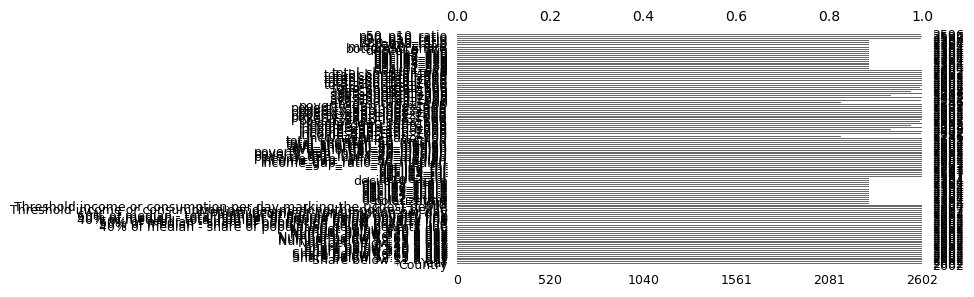

----------------------------------------------------------------------------------------------------
## Visualización de patrones en valores nulos


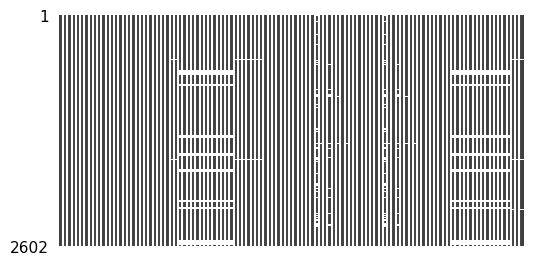

----------------------------------------------------------------------------------------------------


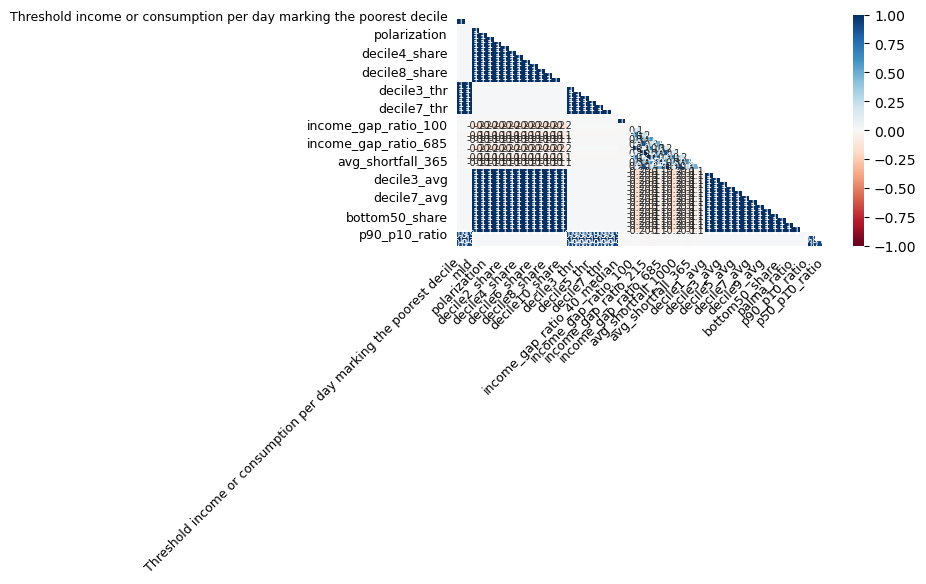

----------------------------------------------------------------------------------------------------
##########################################################################################


In [19]:
#Exploracion inicial
exploracion_inicial(df_pobreza)

In [20]:
#Filtramos el df para obter solo los valores entre 2000-2019
df_pobreza_filtrado = df_pobreza[df_pobreza['Year'].between(2000, 2019)]
df_pobreza_filtrado.head()

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.52886,98.94813,99.762024,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.40567,98.85736,99.546940,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110
3,Albania,2008,0.000000,0.199925,3.902613,33.431850,62.768870,94.58283,98.50923,99.344450,...,11.974607,14.590684,24.551666,29.854542,45.687150,1.114657,4.395911,3.574216,1.957677,1.825743
4,Albania,2012,0.024101,0.620691,4.805442,36.667750,65.062386,95.52016,99.07353,99.742485,...,11.699819,14.170336,21.827140,30.110823,46.954838,1.041193,4.272574,3.630154,1.942752,1.868563
5,Albania,2014,0.000000,1.023101,9.675968,38.743828,60.978160,91.58505,98.09888,99.505390,...,12.904348,16.358868,25.905287,26.073656,48.382023,1.376215,5.930923,5.188477,2.297305,2.258506


In [23]:
#Agregamos un df para hacer la comparacion con el gasto en salud.
df_gasto__salud = pd.read_csv("/Users/guillermogonzalezcervantes/Nuclio Master Data Analytics/TFM/public-healthcare-spending-share-gdp.csv")

#Eliminamos los nulos
df_no_nulos_gasto_salud = df_gasto__salud[df_gasto__salud['Code'].notnull()]
df_no_nulos_gasto_salud.rename(columns={'Domestic general government health expenditure (% of GDP)': '%PIB'}, inplace=True)

#Agrupamos por Quntil.
df_agrupado_gasto_salud = df_no_nulos_gasto_salud.groupby(['Entity', 'Code'], as_index=False)['%PIB'].mean()
df_agrupado_gasto_salud['Quintil'] = pd.qcut(df_agrupado_gasto_salud['%PIB'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df_agrupado_gasto_salud.drop(187, inplace=True)


In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Revisamos (por curiosidad) el pais con el mayor gasto de PIB en salud
valor_maximo=df_gasto__salud['Domestic general government health expenditure (% of GDP)'].max()
df_gasto__salud[df_gasto__salud['Domestic general government health expenditure (% of GDP)']== valor_maximo]['Entity']

4066    Tuvalu
Name: Entity, dtype: object

In [25]:
# Analisis exploratorio del df de gasto de salud.
df_agrupado_gasto_salud.head()

,Entity,Code,%PIB,Quintil
0,Afghanistan,AFG,0.547766,Q1
1,Albania,ALB,2.671878,Q3
2,Algeria,DZA,3.496198,Q4
3,Andorra,AND,4.518334,Q4
4,Angola,AGO,1.551346,Q2


In [26]:
# Hacemos el merge de los dos df
df_pobreza_filtrado = df_pobreza_filtrado.merge(
    df_agrupado_gasto_salud[['Entity', '%PIB', 'Quintil']], 
    left_on='Country', 
    right_on='Entity', 
    how='left'
).drop('Entity', axis=1)

# Reordenar columnas
columnas = list(df_pobreza_filtrado.columns)
country_index = columnas.index('Country')

# Crear nuevo orden: todo hasta Country, luego %PIB y Quintil, luego el resto
nuevas_columnas = (columnas[:country_index+1] + 
                  ['%PIB', 'Quintil'] + 
                  [col for col in columnas[country_index+1:] if col not in ['%PIB', 'Quintil']])

df_pobreza_filtrado = df_pobreza_filtrado[nuevas_columnas]

In [27]:
#Revisamos el nuevo df.
df_pobreza_filtrado.head()

,Country,%PIB,Quintil,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,2.671878,Q3,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.52886,98.94813,99.762024,1415,33337,347459,1589301,2340279,2945105,3018917,3043749,3.212283,8.406373,16.020554,98007,256479,488789,8.108229,6.688141,3.501889,13.990763,0.164812,0.317390,0.268982,3.494002,4.859444,5.842059,6.738204,7.653102,8.839459,10.228584,11.984428,14.925079,25.435638,4.370816,5.093828,5.858262,6.687111,7.662466,8.913951,10.652152,17.543550,18.595226,20.580732,0.563548,1.563182,3.297149,0.469335,0.621838,0.825881,45998.117,159488.27,403681.56,43.873215,41.387882,63.13764,17.337124,74.09592,19.966413,80.05450,31.078033,0.020348,31.746600,60.946040,0.189435,73.31651,2.273840,79.863976,16.188852,0.438732,4.138788,12.627528,0.372748,22.228775,0.728774,32.021797,2.128845,620.80597,9685919.0,37189396.0,12426.3060,67106824.0,253219.12,97466320.0,3383376.0,2.833017,3.940148,4.736875,5.463489,6.205310,7.167236,8.293570,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
1,Albania,2.671878,Q3,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.40567,98.85736,99.546940,0,17800,219516,1217497,2061456,2873129,2977077,2997843,4.095002,8.991532,16.675770,123320,270779,502189,9.165975,7.799791,3.983527,15.433521,0.154413,0.305957,0.254529,3.482536,4.920109,5.977283,6.921183,7.988159,9.037068,10.372144,12.126408,14.833943,24.341167,5.039332,5.949700,6.793219,7.796200,8.827788,10.280450,12.068591,16.876627,20.329166,21.973644,0.691096,1.827905,3.664277,0.526537,0.792816,1.028339,64932.500,214678.00,516420.56,NaN,37.084915,58.72428,15.179814,70.71589,19.209354,77.6

In [28]:
#Revisamos (por curiosidad) el %PIB max invertido en salud
df_pobreza_filtrado['%PIB'].max()

12.79159459090909

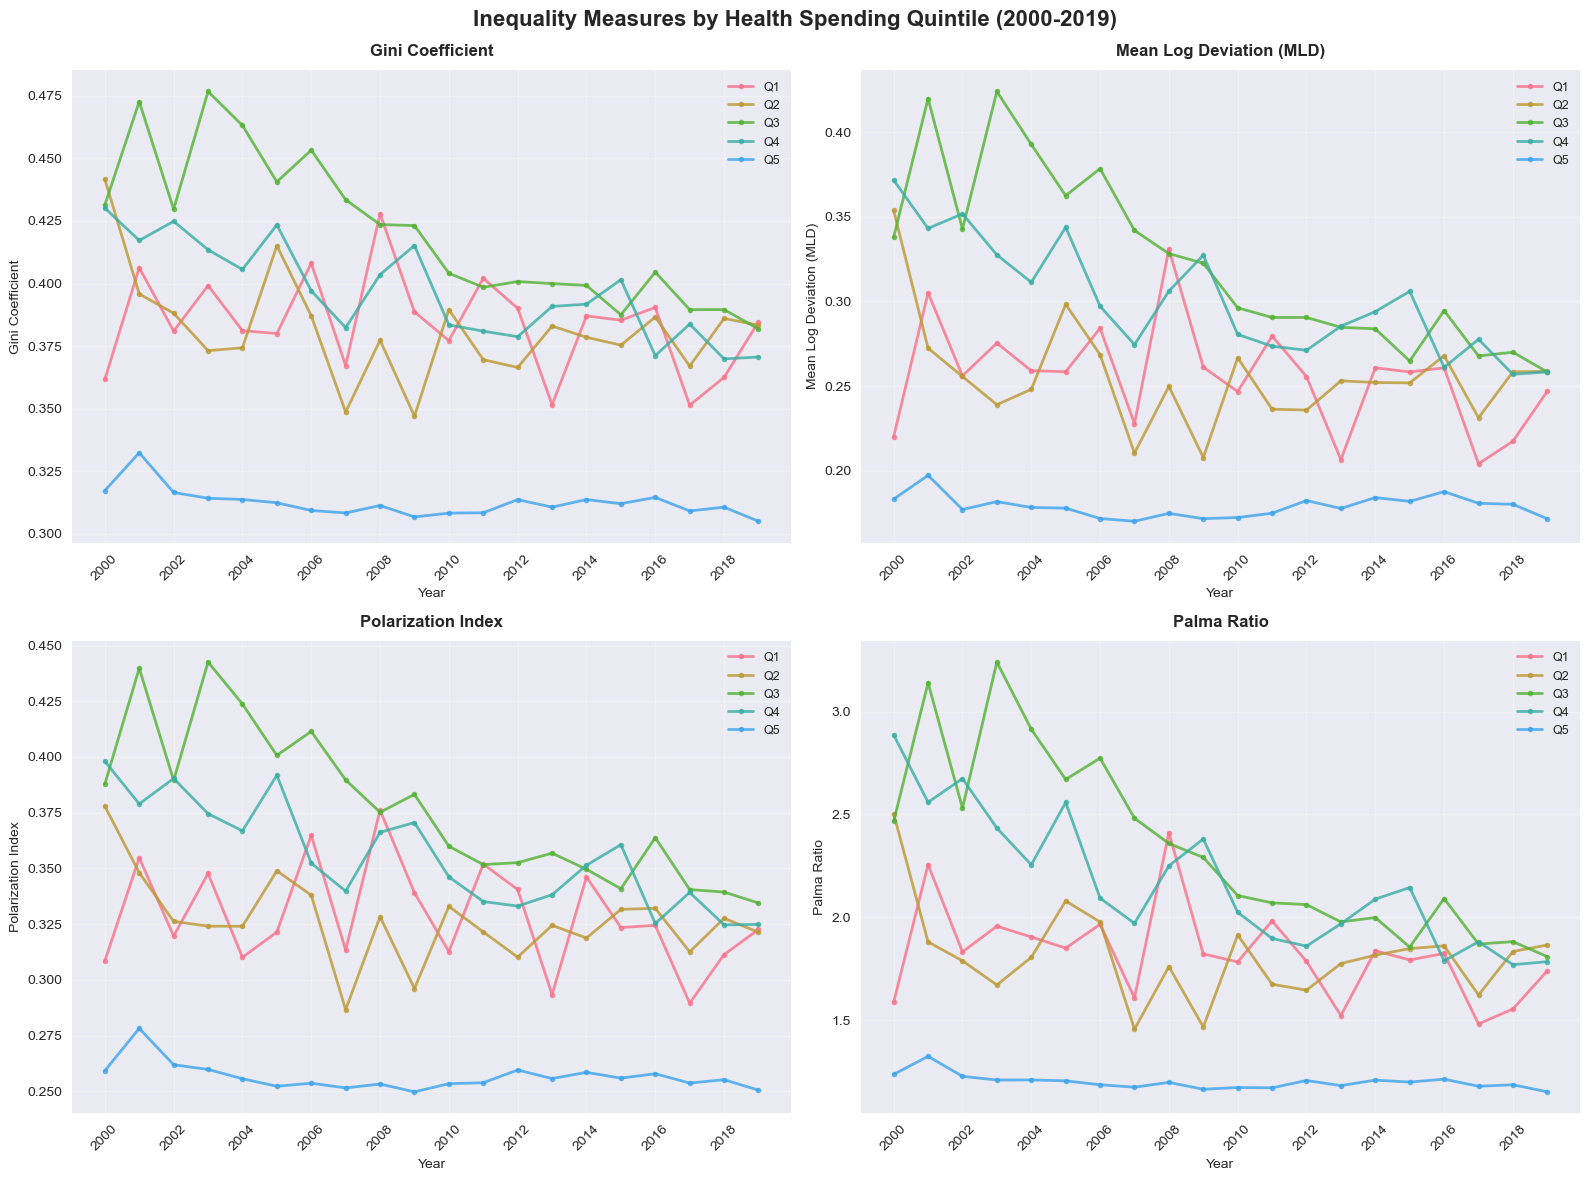

Summary Statistics by Quintile:

GINI:
          mean    std  count
Quintil                     
Q1       0.385  0.061    144
Q2       0.382  0.066    175
Q3       0.417  0.082    253
Q4       0.396  0.097    425
Q5       0.311  0.040    481

MLD:
          mean    std  count
Quintil                     
Q1       0.257  0.093    144
Q2       0.256  0.097    175
Q3       0.316  0.135    253
Q4       0.300  0.160    425
Q5       0.178  0.052    481

POLARIZATION:
          mean    std  count
Quintil                     
Q1       0.329  0.068    144
Q2       0.327  0.071    175
Q3       0.373  0.091    253
Q4       0.355  0.114    425
Q5       0.255  0.041    481

PALMA_RATIO:
          mean    std  count
Quintil                     
Q1       1.832  0.674    144
Q2       1.818  0.713    175
Q3       2.275  1.047    253
Q4       2.150  1.326    425
Q5       1.194  0.257    481


In [29]:

# Parametros de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Creamos las figuras y titulos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Inequality Measures by Health Spending Quintile (2000-2019)', 
             fontsize=16, fontweight='bold', y=0.98)

# Definimos las medidas
measures = ['gini', 'mld', 'polarization', 'palma_ratio']
titles = ['Gini Coefficient', 'Mean Log Deviation (MLD)', 'Polarization Index', 'Palma Ratio']

# Flatten los Axes
axes = axes.flatten()

# Creamos los plos con las medidas
for idx, (measure, title) in enumerate(zip(measures, titles)):
    ax = axes[idx]
    
    # Grupos por Quintil y año, luego calculamos la media
    grouped_data = df_pobreza_filtrado.groupby(['Quintil', 'Year'])[measure].mean().reset_index()
    
    # Graficamos las lineas por quintiles
    for quintil in sorted(grouped_data['Quintil'].dropna().unique()):
        quintil_data = grouped_data[grouped_data['Quintil'] == quintil]
        ax.plot(quintil_data['Year'], quintil_data[measure], 
               marker='o', linewidth=2, markersize=4, 
               label=f'{quintil}', alpha=0.8)
    
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    
    # Establecer el eje x para mostrar todos los años
    ax.set_xticks(range(2000, 2020, 2))
    ax.tick_params(axis='x', rotation=45)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Imprimimos el plot
plt.show()

# Imprimimos las estadisticas
print("Summary Statistics by Quintile:")
print("="*50)
for measure in measures:
    print(f"\n{measure.upper()}:")
    summary = df_pobreza_filtrado.groupby('Quintil')[measure].agg(['mean', 'std', 'count'])
    print(summary.round(3))

In [38]:
df_gasto__salud = df_gasto__salud.rename(columns={'Entity': 'Country'})
df_gasto__salud = df_gasto__salud.rename(columns={'Domestic general government health expenditure (% of GDP)': '% GDP'})
df_gasto__salud.head(5)

,Country,Code,Year,% GDP
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840


In [39]:
#Creamos un df con los datos de esperanza de vida
df_esperanza_vida = pd.read_csv('life_expectancy.csv')
df_esperanza_vida_filtrado = df_esperanza_vida[df_esperanza_vida['Year'].between(2000, 2019)]
df_esperanza_vida_filtrado = df_esperanza_vida_filtrado.rename(columns={'Period life expectancy at birth - Sex: all - Age: 0': 'Life Expectancy'})
df_esperanza_vida_filtrado = df_esperanza_vida_filtrado.rename(columns={'Entity': 'Country'})
df_esperanza_vida_filtrado.head(5)

,Country,Code,Year,Life Expectancy
50,Afghanistan,AFG,2000,55.2978
51,Afghanistan,AFG,2001,55.7981
52,Afghanistan,AFG,2002,56.4538
53,Afghanistan,AFG,2003,57.3445
54,Afghanistan,AFG,2004,57.9436


In [40]:
df_pobreza_filtrado.head(5)

,Country,%PIB,Quintil,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,2.671878,Q3,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.52886,98.94813,99.762024,1415,33337,347459,1589301,2340279,2945105,3018917,3043749,3.212283,8.406373,16.020554,98007,256479,488789,8.108229,6.688141,3.501889,13.990763,0.164812,0.317390,0.268982,3.494002,4.859444,5.842059,6.738204,7.653102,8.839459,10.228584,11.984428,14.925079,25.435638,4.370816,5.093828,5.858262,6.687111,7.662466,8.913951,10.652152,17.543550,18.595226,20.580732,0.563548,1.563182,3.297149,0.469335,0.621838,0.825881,45998.117,159488.27,403681.56,43.873215,41.387882,63.13764,17.337124,74.09592,19.966413,80.05450,31.078033,0.020348,31.746600,60.946040,0.189435,73.31651,2.273840,79.863976,16.188852,0.438732,4.138788,12.627528,0.372748,22.228775,0.728774,32.021797,2.128845,620.80597,9685919.0,37189396.0,12426.3060,67106824.0,253219.12,97466320.0,3383376.0,2.833017,3.940148,4.736875,5.463489,6.205310,7.167236,8.293570,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
1,Albania,2.671878,Q3,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.40567,98.85736,99.546940,0,17800,219516,1217497,2061456,2873129,2977077,2997843,4.095002,8.991532,16.675770,123320,270779,502189,9.165975,7.799791,3.983527,15.433521,0.154413,0.305957,0.254529,3.482536,4.920109,5.977283,6.921183,7.988159,9.037068,10.372144,12.126408,14.833943,24.341167,5.039332,5.949700,6.793219,7.796200,8.827788,10.280450,12.068591,16.876627,20.329166,21.973644,0.691096,1.827905,3.664277,0.526537,0.792816,1.028339,64932.500,214678.00,516420.56,NaN,37.084915,58.72428,15.179814,70.71589,19.209354,77.6

In [52]:
# Primero seleccionar solo las columnas que necesitas de cada DataFrame
df_pobreza_cols = df_pobreza_filtrado[['Country', 'Year', 'Quintil', '%PIB', 'gini', 'Share below $6.85 a day']]
df_esperanza_cols = df_esperanza_vida_filtrado[['Country', 'Year', 'Life Expectancy']]

# Merge entre estos dos DataFrames
df_combinado = pd.merge(df_pobreza_cols, df_esperanza_cols, on=['Country', 'Year'], how='inner')

In [53]:
# Seleccionar columnas del DataFrame de gasto en salud
df_gasto_cols = df_gasto__salud[['Country', 'Year', '% GDP']]

# Hacer merge (nota que las columnas tienen nombres diferentes)
df_final = pd.merge(df_combinado, df_gasto_cols, 
                   left_on=['Country', 'Year'], 
                   right_on=['Country', 'Year'], 
                   how='inner')



In [54]:
#Inspeccion del df final
df_final.head(5)

,Country,Year,Quintil,%PIB,gini,Share below $6.85 a day,Life Expectancy,% GDP
0,Albania,2002,Q3,2.671878,0.317390,52.090965,75.8899,2.588669
1,Albania,2005,Q3,2.671878,0.305957,40.428430,76.6208,2.687232
2,Albania,2008,Q3,2.671878,0.299847,33.431850,77.6529,2.300504
3,Albania,2012,Q3,2.671878,0.289605,36.667750,78.0640,2.455185
4,Albania,2014,Q3,2.671878,0.345989,38.743828,78.4075,2.593627


In [55]:
#Analisamos (por curiosidad) el valor maximo de %PBI invertido a salud
df_final['% GDP'].max()

13.192737

In [56]:
#Analisamos (por curiosidad) el valor minimo de %PBI invertido a salud
df_final['% GDP'].min()

0.18619408

# Formulación de Hipótesis para Análisis de Esperanza de Vida

## Análisis 1: Coeficiente de Gini vs Esperanza de Vida

### Hipótesis Nula (H₀)
No existe una relación estadísticamente significativa entre el coeficiente de Gini (desigualdad de ingresos) y la esperanza de vida. Es decir, las variaciones en la desigualdad económica no tienen un efecto sobre la longevidad de la población.

**Expresión formal:** ρ = 0 (El coeficiente de correlación es igual a cero)

### Hipótesis Alternativa (H₁)
Existe una relación negativa estadísticamente significativa entre el coeficiente de Gini y la esperanza de vida. Es decir, a mayor desigualdad de ingresos (mayor coeficiente de Gini), menor es la esperanza de vida de la población.

**Expresión formal:** ρ < 0 (El coeficiente de correlación es menor que cero)

**Justificación teórica:** La desigualdad económica puede afectar el acceso a servicios de salud, nutrición, educación y condiciones de vida, lo que impactaría negativamente en la longevidad.

---

## Análisis 2: Proporción de Población bajo $6.85/día vs Esperanza de Vida

### Hipótesis Nula (H₀)
No existe una relación estadísticamente significativa entre la proporción de población que vive con menos de $6.85 al día y la esperanza de vida. Es decir, los niveles de pobreza no tienen un efecto sobre la longevidad de la población.

**Expresión formal:** ρ = 0 (El coeficiente de correlación es igual a cero)

### Hipótesis Alternativa (H₁)
Existe una relación negativa estadísticamente significativa entre la proporción de población bajo el umbral de $6.85/día y la esperanza de vida. Es decir, a mayor proporción de población en situación de pobreza, menor es la esperanza de vida.

**Expresión formal:** ρ < 0 (El coeficiente de correlación es menor que cero)

**Justificación teórica:** La pobreza limita el acceso a servicios básicos de salud, alimentación adecuada, agua potable, saneamiento y vivienda digna, factores que son determinantes para una mayor longevidad.

---

## Nivel de Significancia Sugerido
Para ambos análisis se recomienda utilizar α = 0.05 (nivel de confianza del 95%)

In [57]:
import plotly.express as px
import plotly.graph_objects as go

# Filtramos df por 2019
df_2019 = df_final[df_final['Year'] == 2019]

# Define los quintiles y los colores correspondientes
quintiles = df_2019['Quintil'].unique()
colors = [(0.2, 0.4, 0.8), (0.8, 0.2, 0.2), (0.2, 0.8, 0.2), (0.8, 0.8, 0.2), (0.8, 0.2, 0.8)]

# Creamos el color mapping
color_map = {quintil: f'rgb({int(r*255)},{int(g*255)},{int(b*255)})' 
             for quintil, (r,g,b) in zip(quintiles, colors)}

# Creamos el scatterplot
fig = px.scatter(df_2019, 
                x='Life Expectancy', 
                y='gini',
                size='% GDP',
                color='Quintil',
                hover_name='Country',
                title='Gini vs Life Expectancy by Quintile (2019)',
                color_discrete_map=color_map)

fig.show()

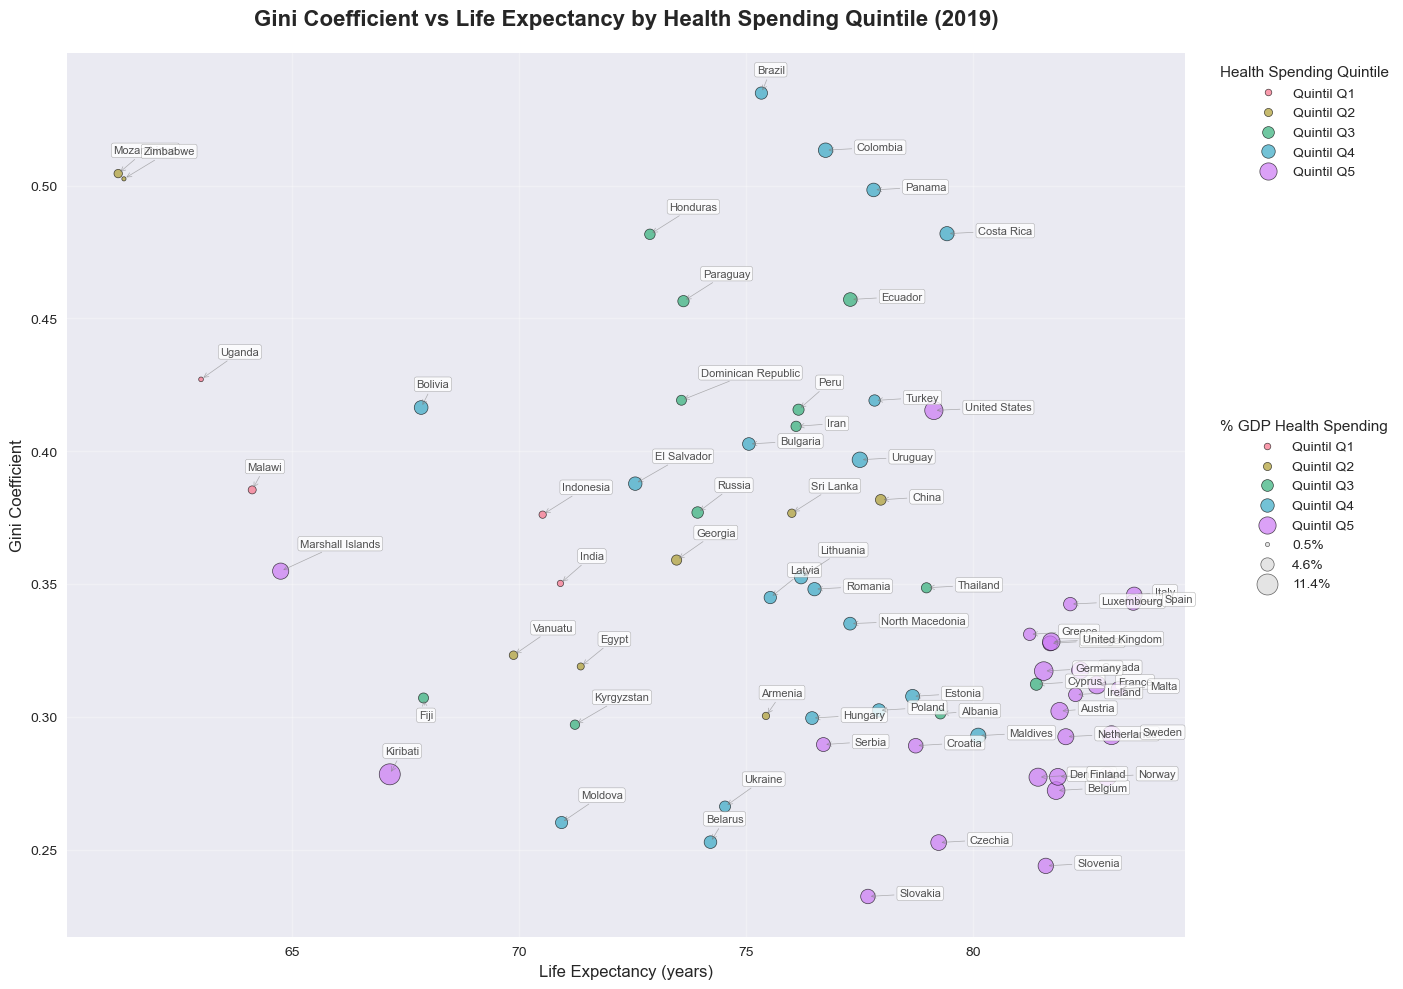

Countries in 2019 data: 71


TypeError: '<' not supported between instances of 'float' and 'str'

In [58]:

# Filtrar datos para el año 2019
df_2019 = df_final[df_final['Year'] == 2019].copy()

# Set style and palette
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure
plt.figure(figsize=(14, 10))

# Get unique quintiles and colors
quintiles = sorted(df_2019['Quintil'].dropna().unique())
colors = sns.color_palette("husl", len(quintiles))

# Create a color map for quintiles
quintil_colors = {quintil: colors[i] for i, quintil in enumerate(quintiles)}

# Create scatter plot for each quintile
for quintil in quintiles:
    quintil_data = df_2019[df_2019['Quintil'] == quintil]
    
    plt.scatter(quintil_data['Life Expectancy'], 
               quintil_data['gini'],
               s=quintil_data['% GDP'] * 20,
               c=[quintil_colors[quintil]], 
               alpha=0.7,
               label=f'Quintil {quintil}',
               edgecolors='black',
               linewidth=0.5)

# Función para evitar solapamiento manual
def get_smart_offset(x, y, existing_positions, min_distance=15):
    """Calcula un offset que evite solapamiento con posiciones existentes"""
    angles = np.linspace(0, 2*np.pi, 8)  # 8 direcciones posibles
    base_distance = min_distance
    
    for distance in [base_distance, base_distance*1.5, base_distance*2]:
        for angle in angles:
            offset_x = distance * np.cos(angle)
            offset_y = distance * np.sin(angle)
            new_pos = (x + offset_x, y + offset_y)
            
            # Verificar si está muy cerca de otras posiciones
            too_close = False
            for existing_pos in existing_positions:
                dist = np.sqrt((new_pos[0] - existing_pos[0])**2 + 
                             (new_pos[1] - existing_pos[1])**2)
                if dist < min_distance:
                    too_close = True
                    break
            
            if not too_close:
                return offset_x, offset_y
    
    # Si no encuentra una buena posición, usar un offset aleatorio
    angle = np.random.random() * 2 * np.pi
    distance = base_distance * 2
    return distance * np.cos(angle), distance * np.sin(angle)

# Añadir etiquetas con posicionamiento inteligente
existing_positions = []
for idx, row in df_2019.iterrows():
    x, y = row['Life Expectancy'], row['gini']
    
    # Calcular offset inteligente
    offset_x, offset_y = get_smart_offset(x, y, existing_positions)
    label_x, label_y = x + offset_x/50, y + offset_y/1000  # Escalar según los ejes
    
    # Añadir etiqueta
    plt.annotate(row['Country'], 
                (x, y),
                xytext=(offset_x, offset_y), 
                textcoords='offset points',
                fontsize=8, 
                alpha=0.8,
                bbox=dict(boxstyle='round,pad=0.2', 
                         facecolor='white', 
                         alpha=0.8, 
                         edgecolor='gray',
                         linewidth=0.3),
                arrowprops=dict(arrowstyle='->', 
                               color='gray', 
                               alpha=0.6, 
                               lw=0.5))
    
    existing_positions.append((label_x, label_y))

# Customize the plot
plt.title('Gini Coefficient vs Life Expectancy by Health Spending Quintile (2019)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Life Expectancy (years)', fontsize=12)
plt.ylabel('Gini Coefficient', fontsize=12)

# Add legend for quintiles
legend1 = plt.legend(title='Health Spending Quintile', 
                    bbox_to_anchor=(1.02, 1), 
                    loc='upper left',
                    fontsize=10,
                    title_fontsize=11)

# Add grid
plt.grid(True, alpha=0.3)

# Crear segunda leyenda para tamaño de burbujas
gdp_values = df_2019['% GDP'].dropna()
bubble_examples = [gdp_values.min(), gdp_values.median(), gdp_values.max()]
bubble_labels = [f'{val:.1f}%' for val in bubble_examples]

for i, (size_val, label) in enumerate(zip(bubble_examples, bubble_labels)):
    plt.scatter([], [], s=size_val*20, c='lightgray', alpha=0.6, 
               edgecolors='black', linewidth=0.5, label=label)

legend2 = plt.legend(title='% GDP Health Spending', 
                    bbox_to_anchor=(1.02, 0.6), 
                    loc='upper left',
                    fontsize=10,
                    title_fontsize=11)

plt.gca().add_artist(legend1)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# Print statistics
print(f"Countries in 2019 data: {len(df_2019)}")
print(f"Quintiles represented: {sorted(df_2019['Quintil'].unique())}")

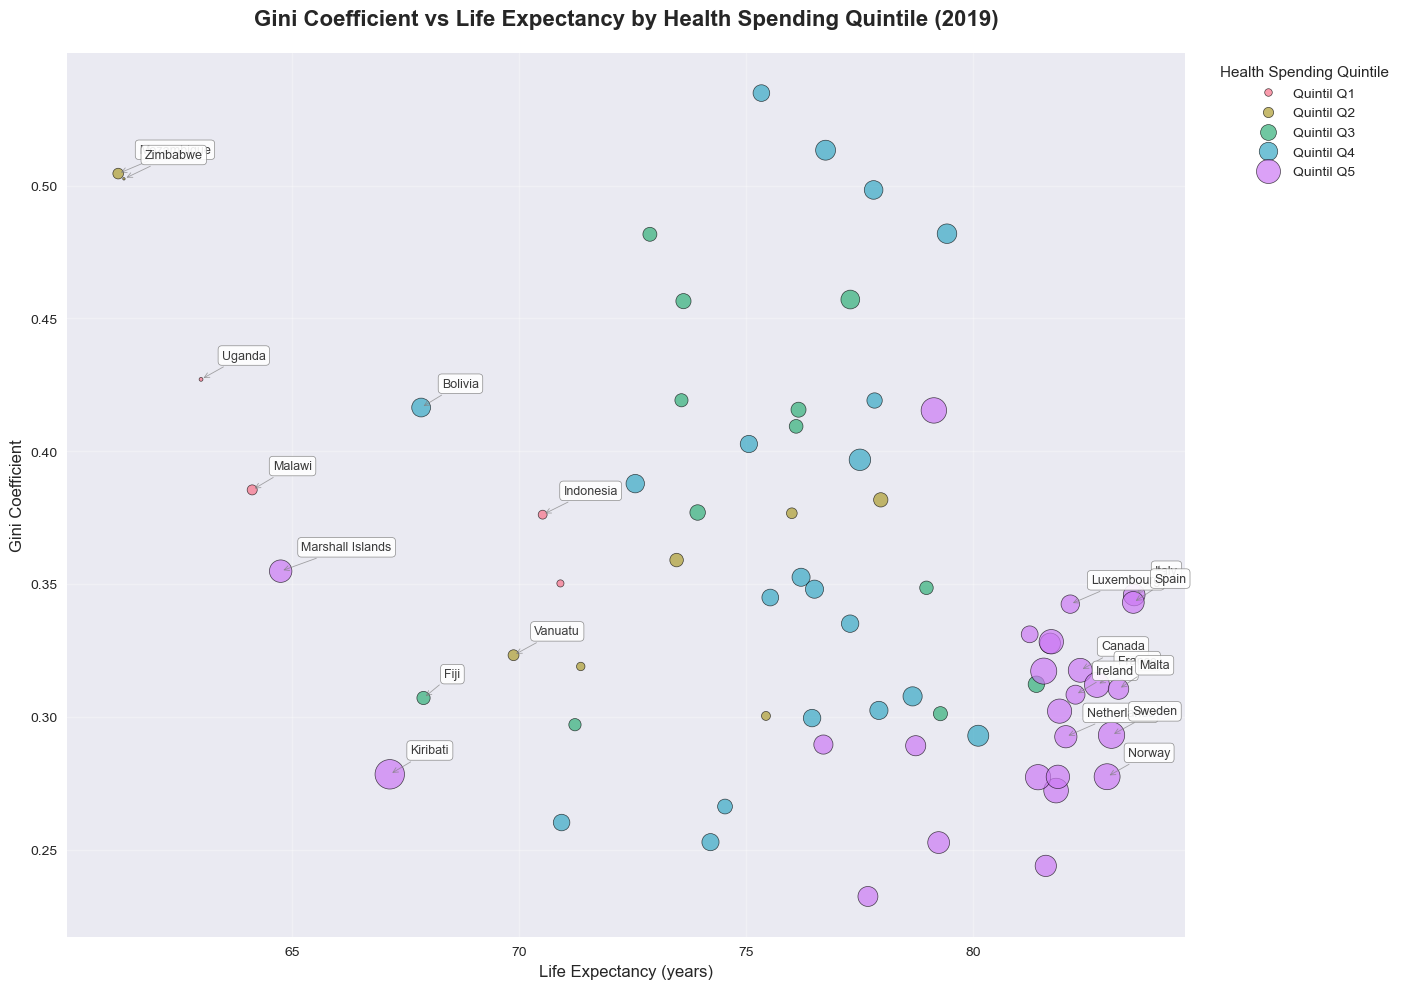

Countries in 2019 data: 71

Top 10 Life Expectancy countries labeled:
  Italy: 83.6 years
  Spain: 83.5 years
  Malta: 83.2 years
  Sweden: 83.1 years
  Norway: 83.0 years
  France: 82.7 years
  Canada: 82.4 years
  Ireland: 82.3 years
  Luxembourg: 82.1 years
  Netherlands: 82.0 years

Bottom 10 Life Expectancy countries labeled:
  Mozambique: 61.2 years
  Zimbabwe: 61.3 years
  Uganda: 63.0 years
  Malawi: 64.1 years
  Marshall Islands: 64.7 years
  Kiribati: 67.1 years
  Bolivia: 67.8 years
  Fiji: 67.9 years
  Vanuatu: 69.9 years
  Indonesia: 70.5 years


In [59]:

# Filtrar datos para el año 2019
df_2019 = df_final[df_final['Year'] == 2019].copy()

# Función para escalar el tamaño de las burbujas
def scale_bubble_size(values, min_size=0.10, max_size=15):
    """Escala los valores para que el mínimo sea min_size y el máximo sea max_size"""
    min_val = values.min()
    max_val = values.max()
    scaled = min_size + (values - min_val) * (max_size - min_size) / (max_val - min_val)
    return scaled

# Escalar los tamaños de burbuja
df_2019['bubble_size'] = scale_bubble_size(df_2019['% GDP'], min_size=0.10, max_size=15)

# Identificar Top 10 y Bottom 10 países por Life Expectancy
top_10 = df_2019.nlargest(10, 'Life Expectancy')['Country'].tolist()
bottom_10 = df_2019.nsmallest(10, 'Life Expectancy')['Country'].tolist()
countries_to_label = set(top_10 + bottom_10)  # Usar set para evitar duplicados

# Set style and palette
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure
plt.figure(figsize=(14, 10))

# Get unique quintiles and colors
quintiles = sorted(df_2019['Quintil'].dropna().unique())
colors = sns.color_palette("husl", len(quintiles))

# Create a color map for quintiles
quintil_colors = {quintil: colors[i] for i, quintil in enumerate(quintiles)}

# Create scatter plot for each quintile
for quintil in quintiles:
    quintil_data = df_2019[df_2019['Quintil'] == quintil]
    
    plt.scatter(quintil_data['Life Expectancy'], 
               quintil_data['gini'],
               s=quintil_data['bubble_size'] * 30,
               c=[quintil_colors[quintil]], 
               alpha=0.7,
               label=f'Quintil {quintil}',
               edgecolors='black',
               linewidth=0.5)

# Función para posicionamiento inteligente de etiquetas
def get_best_offset(x, y, all_points, base_offset=15):
    """Encuentra el mejor offset para una etiqueta"""
    angles = [0, 45, 90, 135, 180, 225, 270, 315]
    
    for angle in angles:
        rad = np.radians(angle)
        offset_x = base_offset * np.cos(rad)
        offset_y = base_offset * np.sin(rad)
        
        label_x = x + offset_x/50
        label_y = y + offset_y/1000
        
        distances = np.sqrt((all_points['Life Expectancy'] - label_x)**2 + 
                           (all_points['gini'] - label_y)**2)
        
        if distances.min() > 0.5:
            return offset_x, offset_y
    
    return base_offset, base_offset

# Add country labels SOLO para Top 10 y Bottom 10
for idx, row in df_2019.iterrows():
    # Solo etiquetar si el país está en la lista de countries_to_label
    if row['Country'] in countries_to_label:
        x, y = row['Life Expectancy'], row['gini']
        
        offset_x, offset_y = get_best_offset(x, y, df_2019)
        
        plt.annotate(row['Country'], 
                    (x, y),
                    xytext=(offset_x, offset_y), 
                    textcoords='offset points',
                    fontsize=9,  # Aumenté un poco el tamaño ya que hay menos etiquetas
                    alpha=0.9,
                    bbox=dict(boxstyle='round,pad=0.3', 
                             facecolor='white', 
                             alpha=0.9, 
                             edgecolor='gray',
                             linewidth=0.5),
                    arrowprops=dict(arrowstyle='->', 
                                   color='gray', 
                                   alpha=0.7, 
                                   lw=0.6))

# Customize the plot
plt.title('Gini Coefficient vs Life Expectancy by Health Spending Quintile (2019)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Life Expectancy (years)', fontsize=12)
plt.ylabel('Gini Coefficient', fontsize=12)

# Add grid
plt.grid(True, alpha=0.3)

# Solo la leyenda de quintiles por colores
plt.legend(title='Health Spending Quintile', 
          bbox_to_anchor=(1.02, 1), 
          loc='upper left',
          fontsize=10,
          title_fontsize=11)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# Print statistics y países etiquetados
print(f"Countries in 2019 data: {len(df_2019)}")
print(f"\nTop 10 Life Expectancy countries labeled:")
for country in top_10:
    le_val = df_2019[df_2019['Country'] == country]['Life Expectancy'].iloc[0]
    print(f"  {country}: {le_val:.1f} years")

print(f"\nBottom 10 Life Expectancy countries labeled:")
for country in bottom_10:
    le_val = df_2019[df_2019['Country'] == country]['Life Expectancy'].iloc[0]
    print(f"  {country}: {le_val:.1f} years")

## Hacemos un analisis de Experanza de vida vs "Share below $6.85 a day"

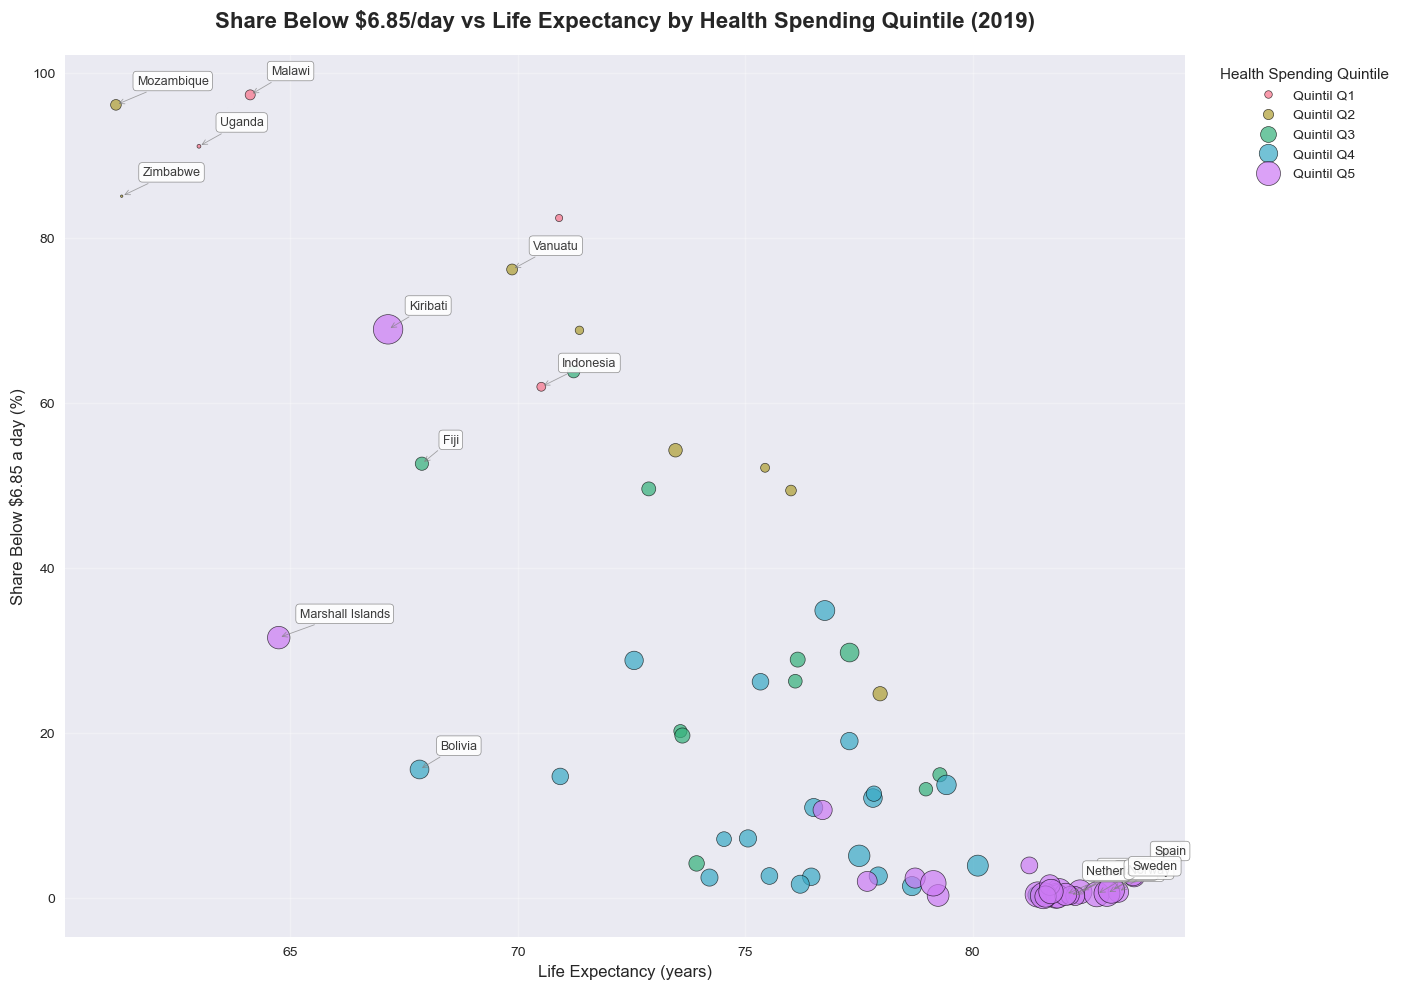

Countries in 2019 data: 71

Top 10 Life Expectancy countries labeled:
  Italy: 83.6 years
  Spain: 83.5 years
  Malta: 83.2 years
  Sweden: 83.1 years
  Norway: 83.0 years
  France: 82.7 years
  Canada: 82.4 years
  Ireland: 82.3 years
  Luxembourg: 82.1 years
  Netherlands: 82.0 years

Bottom 10 Life Expectancy countries labeled:
  Mozambique: 61.2 years
  Zimbabwe: 61.3 years
  Uganda: 63.0 years
  Malawi: 64.1 years
  Marshall Islands: 64.7 years
  Kiribati: 67.1 years
  Bolivia: 67.8 years
  Fiji: 67.9 years
  Vanuatu: 69.9 years
  Indonesia: 70.5 years


In [60]:
# Filtrar datos para el año 2019
df_2019 = df_final[df_final['Year'] == 2019].copy()

# Función para escalar el tamaño de las burbujas
def scale_bubble_size(values, min_size=0.10, max_size=15):
    """Escala los valores para que el mínimo sea min_size y el máximo sea max_size"""
    min_val = values.min()
    max_val = values.max()
    scaled = min_size + (values - min_val) * (max_size - min_size) / (max_val - min_val)
    return scaled

# Escalar los tamaños de burbuja
df_2019['bubble_size'] = scale_bubble_size(df_2019['% GDP'], min_size=0.10, max_size=15)

# Identificar Top 10 y Bottom 10 países por Life Expectancy
top_10 = df_2019.nlargest(10, 'Life Expectancy')['Country'].tolist()
bottom_10 = df_2019.nsmallest(10, 'Life Expectancy')['Country'].tolist()
countries_to_label = set(top_10 + bottom_10)  # Usar set para evitar duplicados

# Set style and palette
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure
plt.figure(figsize=(14, 10))

# Get unique quintiles and colors
quintiles = sorted(df_2019['Quintil'].dropna().unique())
colors = sns.color_palette("husl", len(quintiles))

# Create a color map for quintiles
quintil_colors = {quintil: colors[i] for i, quintil in enumerate(quintiles)}

# Create scatter plot for each quintile
for quintil in quintiles:
    quintil_data = df_2019[df_2019['Quintil'] == quintil]
    
    plt.scatter(quintil_data['Life Expectancy'], 
               quintil_data['Share below $6.85 a day'],
               s=quintil_data['bubble_size'] * 30,
               c=[quintil_colors[quintil]], 
               alpha=0.7,
               label=f'Quintil {quintil}',
               edgecolors='black',
               linewidth=0.5)

# Función para posicionamiento inteligente de etiquetas
def get_best_offset(x, y, all_points, base_offset=15):
    """Encuentra el mejor offset para una etiqueta"""
    angles = [0, 45, 90, 135, 180, 225, 270, 315]
    
    for angle in angles:
        rad = np.radians(angle)
        offset_x = base_offset * np.cos(rad)
        offset_y = base_offset * np.sin(rad)
        
        label_x = x + offset_x/50
        label_y = y + offset_y/100  # Ajustado para la nueva escala
        
        distances = np.sqrt((all_points['Life Expectancy'] - label_x)**2 + 
                           (all_points['Share below $6.85 a day'] - label_y)**2)
        
        if distances.min() > 0.5:
            return offset_x, offset_y
    
    return base_offset, base_offset

# Add country labels SOLO para Top 10 y Bottom 10
for idx, row in df_2019.iterrows():
    # Solo etiquetar si el país está en la lista de countries_to_label
    if row['Country'] in countries_to_label:
        x, y = row['Life Expectancy'], row['Share below $6.85 a day']
        
        offset_x, offset_y = get_best_offset(x, y, df_2019)
        
        plt.annotate(row['Country'], 
                    (x, y),
                    xytext=(offset_x, offset_y), 
                    textcoords='offset points',
                    fontsize=9,
                    alpha=0.9,
                    bbox=dict(boxstyle='round,pad=0.3', 
                             facecolor='white', 
                             alpha=0.9, 
                             edgecolor='gray',
                             linewidth=0.5),
                    arrowprops=dict(arrowstyle='->', 
                                   color='gray', 
                                   alpha=0.7, 
                                   lw=0.6))

# Customize the plot
plt.title('Share Below $6.85/day vs Life Expectancy by Health Spending Quintile (2019)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Life Expectancy (years)', fontsize=12)
plt.ylabel('Share Below $6.85 a day (%)', fontsize=12)

# Add grid
plt.grid(True, alpha=0.3)

# Solo la leyenda de quintiles por colores
plt.legend(title='Health Spending Quintile', 
          bbox_to_anchor=(1.02, 1), 
          loc='upper left',
          fontsize=10,
          title_fontsize=11)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# Print statistics y países etiquetados
print(f"Countries in 2019 data: {len(df_2019)}")
print(f"\nTop 10 Life Expectancy countries labeled:")
for country in top_10:
    le_val = df_2019[df_2019['Country'] == country]['Life Expectancy'].iloc[0]
    print(f"  {country}: {le_val:.1f} years")

print(f"\nBottom 10 Life Expectancy countries labeled:")
for country in bottom_10:
    le_val = df_2019[df_2019['Country'] == country]['Life Expectancy'].iloc[0]
    print(f"  {country}: {le_val:.1f} years")

## Animacion para ver el desarrollo de la esperanza de vida vs Gni 2000-2019

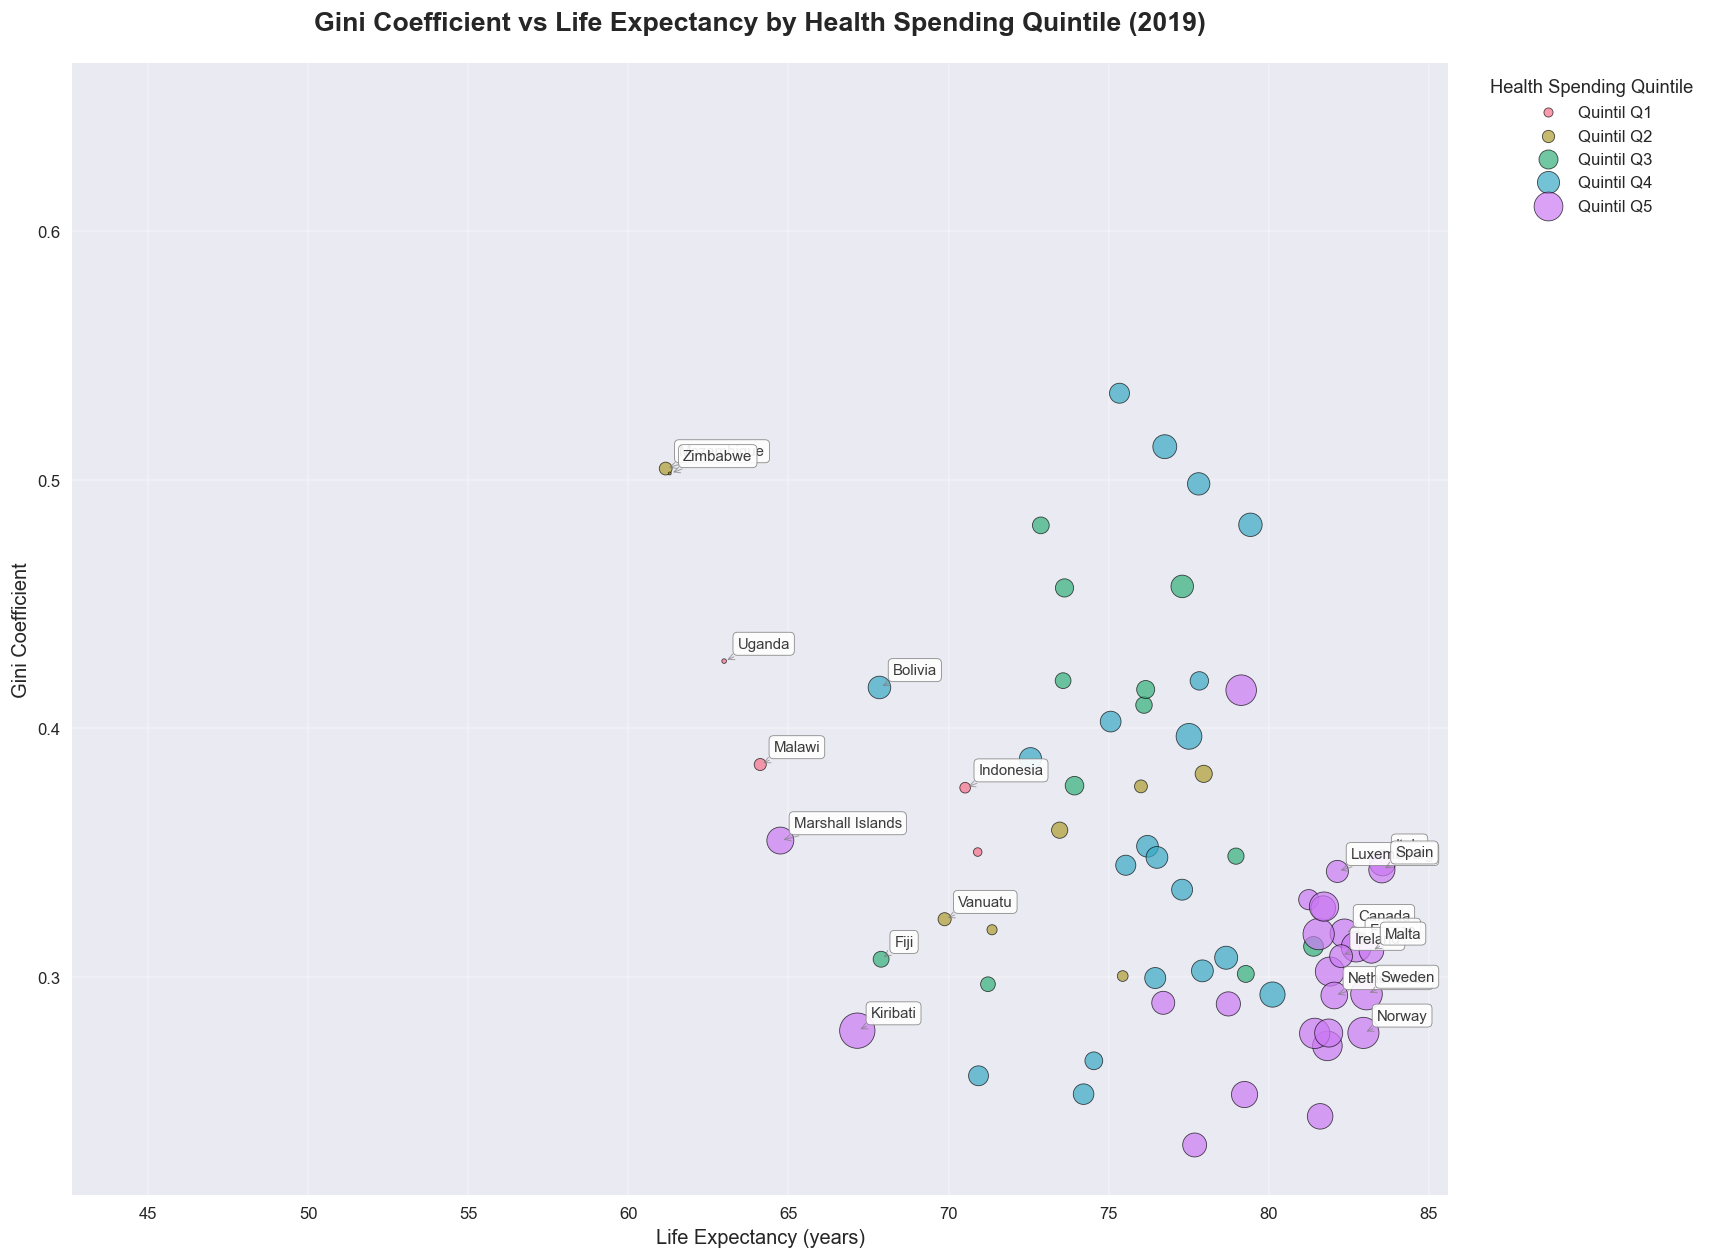

Animation created for years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
Total frames: 20
Top 10 and Bottom 10 countries will be labeled in each frame


In [49]:

from matplotlib.animation import FuncAnimation

# Función para escalar el tamaño de las burbujas
def scale_bubble_size(values, min_size=0.10, max_size=15):
    """Escala los valores para que el mínimo sea min_size y el máximo sea max_size"""
    min_val = values.min()
    max_val = values.max()
    scaled = min_size + (values - min_val) * (max_size - min_size) / (max_val - min_val)
    return scaled

# Preparar datos y configuración
years = sorted(df_final['Year'].unique())
years = [year for year in years if 2000 <= year <= 2019]  # Filtrar 2000-2019

# Set style and palette
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Get quintiles and colors (usando todos los datos para consistencia)
quintiles = sorted(df_final['Quintil'].dropna().unique())
colors = sns.color_palette("husl", len(quintiles))
quintil_colors = {quintil: colors[i] for i, quintil in enumerate(quintiles)}

# Establecer límites fijos para los ejes (usando todos los años)
life_exp_min = df_final['Life Expectancy'].min() - 2
life_exp_max = df_final['Life Expectancy'].max() + 2
gini_min = df_final['gini'].min() - 0.02
gini_max = df_final['gini'].max() + 0.02

# Create figure
fig, ax = plt.subplots(figsize=(14, 10), dpi=120)

def update(frame):
    # Clear the current plot to redraw
    ax.clear()
    
    # Filter data for the specific year
    df_year = df_final[df_final['Year'] == frame].copy()
    
    if len(df_year) == 0:  # Si no hay datos para ese año
        return ax
    
    # Escalar burbujas para este año
    df_year['bubble_size'] = scale_bubble_size(df_year['% GDP'], min_size=0.10, max_size=15)
    
    # Identificar Top 10 y Bottom 10 para este año
    top_10 = df_year.nlargest(10, 'Life Expectancy')['Country'].tolist()
    bottom_10 = df_year.nsmallest(10, 'Life Expectancy')['Country'].tolist()
    countries_to_label = set(top_10 + bottom_10)
    
    # Create scatter plot for each quintile
    for quintil in quintiles:
        quintil_data = df_year[df_year['Quintil'] == quintil]
        
        if len(quintil_data) > 0:  # Solo si hay datos para este quintil
            ax.scatter(quintil_data['Life Expectancy'], 
                      quintil_data['gini'],
                      s=quintil_data['bubble_size'] * 30,
                      c=[quintil_colors[quintil]], 
                      alpha=0.7,
                      label=f'Quintil {quintil}',
                      edgecolors='black',
                      linewidth=0.5)
    
    # Add country labels solo para Top/Bottom 10
    for idx, row in df_year.iterrows():
        if row['Country'] in countries_to_label:
            ax.annotate(row['Country'], 
                       (row['Life Expectancy'], row['gini']),
                       xytext=(8, 8), 
                       textcoords='offset points',
                       fontsize=9, 
                       alpha=0.9,
                       bbox=dict(boxstyle='round,pad=0.3', 
                                facecolor='white', 
                                alpha=0.9, 
                                edgecolor='gray',
                                linewidth=0.5),
                       arrowprops=dict(arrowstyle='->', 
                                      color='gray', 
                                      alpha=0.7, 
                                      lw=0.6))
    
    # Customize the plot
    ax.set_title(f'Gini Coefficient vs Life Expectancy by Health Spending Quintile ({int(frame)})', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Life Expectancy (years)', fontsize=12)
    ax.set_ylabel('Gini Coefficient', fontsize=12)
    
    # Set fixed limits para consistencia en la animación
    ax.set_xlim(life_exp_min, life_exp_max)
    ax.set_ylim(gini_min, gini_max)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend (solo una vez por frame)
    ax.legend(title='Health Spending Quintile', 
             bbox_to_anchor=(1.02, 1), 
             loc='upper left',
             fontsize=10,
             title_fontsize=11)
    
    return ax

# Create animation
ani = FuncAnimation(fig, update, frames=years, interval=800, repeat=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.85)

# Save animation as GIF
ani.save('life_expectancy_gini_animation.gif', fps=5, writer='pillow')

# Show animation
plt.show()

# Print information about the animation
print(f"Animation created for years: {years}")
print(f"Total frames: {len(years)}")
print(f"Top 10 and Bottom 10 countries will be labeled in each frame")

In [61]:

from adjustText import adjust_text  # Import adjust_text

# Filtrar datos para el año 2019
df_2019 = df_final[df_final['Year'] == 2019].copy()

# Función para escalar el tamaño de las burbujas
def scale_bubble_size(values, min_size=0.10, max_size=15):
    """Escala los valores para que el mínimo sea min_size y el máximo sea max_size"""
    min_val = values.min()
    max_val = values.max()
    scaled = min_size + (values - min_val) * (max_size - min_size) / (max_val - min_val)
    return scaled

# Escalar los tamaños de burbuja
df_2019['bubble_size'] = scale_bubble_size(df_2019['% GDP'], min_size=0.10, max_size=15)

# Identificar Top 10 y Bottom 10 países por Life Expectancy
top_10 = df_2019.nlargest(10, 'Life Expectancy')['Country'].tolist()
bottom_10 = df_2019.nsmallest(10, 'Life Expectancy')['Country'].tolist()
countries_to_label = set(top_10 + bottom_10)  # Usar set para evitar duplicados

# Set style and palette
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Get unique quintiles and colors
quintiles = sorted(df_2019['Quintil'].dropna().unique())
colors = sns.color_palette("husl", len(quintiles))

# Create a color map for quintiles
quintil_colors = {quintil: colors[i] for i, quintil in enumerate(quintiles)}

# Create scatter plot for each quintile
for quintil in quintiles:
    quintil_data = df_2019[df_2019['Quintil'] == quintil]
    
    ax.scatter(quintil_data['Life Expectancy'], 
               quintil_data['gini'],
               s=quintil_data['bubble_size'] * 30,
               c=[quintil_colors[quintil]], 
               alpha=0.7,
               label=f'Quintil {quintil}',
               edgecolors='black',
               linewidth=0.5)

# Add country labels SOLO para Top 10 y Bottom 10
# Collect text objects in a list for adjust_text
TEXTS = []
for idx, row in df_2019.iterrows():
    # Solo etiquetar si el país está en la lista de countries_to_label
    if row['Country'] in countries_to_label:
        x = row['Life Expectancy']
        y = row['gini']
        
        # Create text object and append to TEXTS list
        text = ax.text(x, y, row['Country'], 
                      fontsize=9,
                      alpha=0.9,
                      bbox=dict(boxstyle='round,pad=0.3', 
                               facecolor='white', 
                               alpha=0.9, 
                               edgecolor='gray',
                               linewidth=0.5))
        TEXTS.append(text)

# Adjust text positions to avoid overlaps
# 'expand_points' expands the bounding box of texts when repelling them from points
# 'arrowprops' defines the arrow properties
adjust_text(
    TEXTS,
    expand_points=(1.5, 1.5),  # Multipliers to expand bounding box
    expand_text=(1.2, 1.2),    # Multipliers to expand text bounding box
    arrowprops=dict(
        arrowstyle='->', 
        color='gray', 
        alpha=0.7, 
        lw=0.6
    ),
    ax=ax,
    force_points=0.3,  # Force to repel texts from points
    force_text=0.8,    # Force to repel texts from each other
)

# Customize the plot
ax.set_title('Gini Coefficient vs Life Expectancy by Health Spending Quintile (2019)', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Life Expectancy (years)', fontsize=12)
ax.set_ylabel('Gini Coefficient', fontsize=12)

# Add grid
ax.grid(True, alpha=0.3)

# Solo la leyenda de quintiles por colores
ax.legend(title='Health Spending Quintile', 
         bbox_to_anchor=(1.02, 1), 
         loc='upper left',
         fontsize=10,
         title_fontsize=11)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# Print statistics y países etiquetados
print(f"Countries in 2019 data: {len(df_2019)}")
print(f"\nTop 10 Life Expectancy countries labeled:")
for country in top_10:
    le_val = df_2019[df_2019['Country'] == country]['Life Expectancy'].iloc[0]
    print(f"  {country}: {le_val:.1f} years")

print(f"\nBottom 10 Life Expectancy countries labeled:")
for country in bottom_10:
    le_val = df_2019[df_2019['Country'] == country]['Life Expectancy'].iloc[0]
    print(f"  {country}: {le_val:.1f} years")

ModuleNotFoundError: No module named 'adjustText'

## Modelo rapido (Borrador)

ANÁLISIS DE CORRELACIÓN: ÍNDICE DE GINI VS ESPERANZA DE VIDA (2019)

1. ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------

Índice de Gini:
  Media: 0.350
  Mediana: 0.333
  Desv. Estándar: 0.073
  Min: 0.232
  Max: 0.535

Esperanza de Vida:
  Media: 76.3 años
  Mediana: 77.3 años
  Desv. Estándar: 5.6 años
  Min: 61.2 años
  Max: 83.6 años

2. ANÁLISIS DE CORRELACIÓN
----------------------------------------

Correlación de Pearson: -0.3831
  Valor p: 1.0628e-03
  Significancia: Sí (α = 0.05)

Correlación de Spearman: -0.3754
  Valor p: 1.3643e-03
  Significancia: Sí (α = 0.05)

Interpretación: Correlación moderada y negativa

3. ANÁLISIS DE REGRESIÓN LINEAL
----------------------------------------

R² (coeficiente de determinación): 0.1468
  Interpretación: El 14.68% de la variación en la esperanza de vida
                  se explica por el índice de Gini

Ecuación de regresión:
  Life Expectancy = 86.71 + (-29.64 × Gini)

4. CORRELACIÓN POR QUINTILES DE GASTO EN SALU

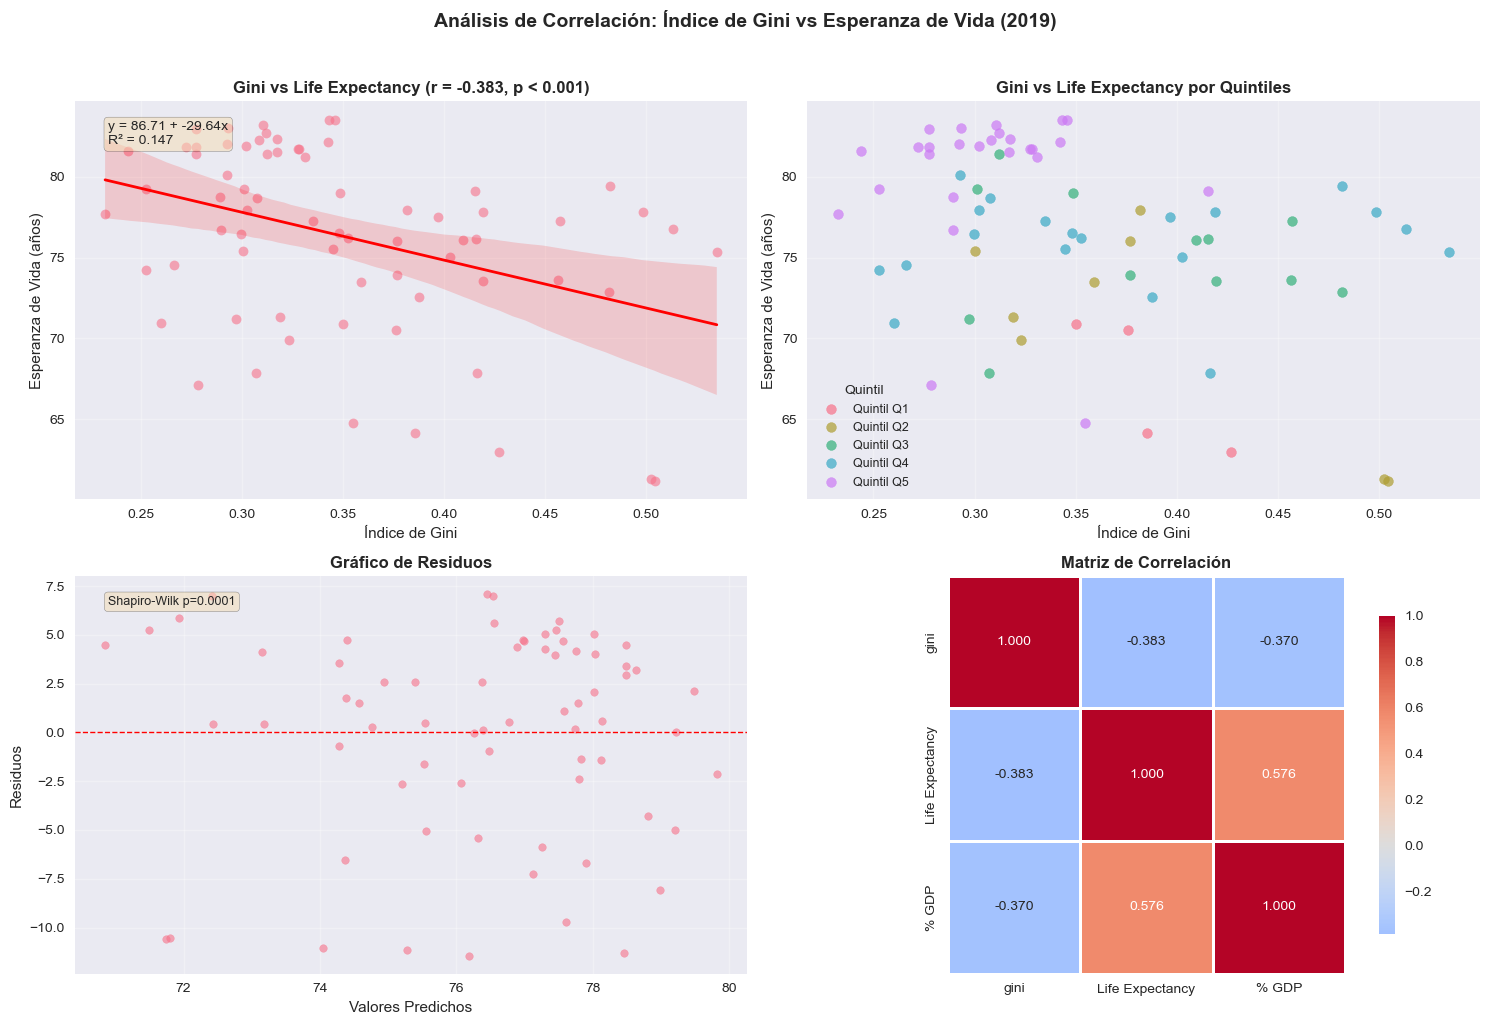


5. ANÁLISIS DE PAÍSES EXTREMOS
----------------------------------------

Países con Alto Gini (>P75) y Baja Esperanza de Vida (<P25):
  Bolivia: Gini=0.416, Life Exp=67.8
  Dominican Republic: Gini=0.419, Life Exp=73.6
  Honduras: Gini=0.482, Life Exp=72.9
  Mozambique: Gini=0.505, Life Exp=61.2
  Uganda: Gini=0.427, Life Exp=63.0
  Zimbabwe: Gini=0.503, Life Exp=61.3

Países con Bajo Gini (<P25) y Alta Esperanza de Vida (>P75):
  Belgium: Gini=0.272, Life Exp=81.8
  Denmark: Gini=0.277, Life Exp=81.4
  Finland: Gini=0.277, Life Exp=81.9
  Netherlands: Gini=0.292, Life Exp=82.0
  Norway: Gini=0.277, Life Exp=83.0
  Slovenia: Gini=0.244, Life Exp=81.6
  Sweden: Gini=0.293, Life Exp=83.1

6. CONCLUSIONES
----------------------------------------
✓ Existe una correlación negativa (-0.383) entre el índice de Gini
  y la esperanza de vida, sugiriendo que mayor desigualdad está asociada
  con menor esperanza de vida.

✓ Esta correlación es estadísticamente significativa (p < 0.001)

✓ El mod

In [63]:

from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Filtrar datos para el año 2019 (asumiendo que df_final ya existe)
df_2019 = df_final[df_final['Year'] == 2019].copy()

# Eliminar valores nulos para el análisis
df_analysis = df_2019[['Country', 'gini', 'Life Expectancy', 'Quintil', '% GDP']].dropna()

print("=" * 80)
print("ANÁLISIS DE CORRELACIÓN: ÍNDICE DE GINI VS ESPERANZA DE VIDA (2019)")
print("=" * 80)

# 1. ESTADÍSTICAS DESCRIPTIVAS
print("\n1. ESTADÍSTICAS DESCRIPTIVAS")
print("-" * 40)
print("\nÍndice de Gini:")
print(f"  Media: {df_analysis['gini'].mean():.3f}")
print(f"  Mediana: {df_analysis['gini'].median():.3f}")
print(f"  Desv. Estándar: {df_analysis['gini'].std():.3f}")
print(f"  Min: {df_analysis['gini'].min():.3f}")
print(f"  Max: {df_analysis['gini'].max():.3f}")

print("\nEsperanza de Vida:")
print(f"  Media: {df_analysis['Life Expectancy'].mean():.1f} años")
print(f"  Mediana: {df_analysis['Life Expectancy'].median():.1f} años")
print(f"  Desv. Estándar: {df_analysis['Life Expectancy'].std():.1f} años")
print(f"  Min: {df_analysis['Life Expectancy'].min():.1f} años")
print(f"  Max: {df_analysis['Life Expectancy'].max():.1f} años")

# 2. ANÁLISIS DE CORRELACIÓN
print("\n2. ANÁLISIS DE CORRELACIÓN")
print("-" * 40)

# Correlación de Pearson
pearson_corr, pearson_pval = stats.pearsonr(df_analysis['gini'], df_analysis['Life Expectancy'])
print(f"\nCorrelación de Pearson: {pearson_corr:.4f}")
print(f"  Valor p: {pearson_pval:.4e}")
print(f"  Significancia: {'Sí' if pearson_pval < 0.05 else 'No'} (α = 0.05)")

# Correlación de Spearman (no paramétrica)
spearman_corr, spearman_pval = stats.spearmanr(df_analysis['gini'], df_analysis['Life Expectancy'])
print(f"\nCorrelación de Spearman: {spearman_corr:.4f}")
print(f"  Valor p: {spearman_pval:.4e}")
print(f"  Significancia: {'Sí' if spearman_pval < 0.05 else 'No'} (α = 0.05)")

# Interpretación de la correlación
def interpret_correlation(corr):
    abs_corr = abs(corr)
    if abs_corr < 0.1:
        return "Negligible"
    elif abs_corr < 0.3:
        return "Débil"
    elif abs_corr < 0.5:
        return "Moderada"
    elif abs_corr < 0.7:
        return "Fuerte"
    else:
        return "Muy fuerte"

print(f"\nInterpretación: Correlación {interpret_correlation(pearson_corr).lower()} y {'negativa' if pearson_corr < 0 else 'positiva'}")

# 3. REGRESIÓN LINEAL
print("\n3. ANÁLISIS DE REGRESIÓN LINEAL")
print("-" * 40)

X = df_analysis['gini'].values.reshape(-1, 1)
y = df_analysis['Life Expectancy'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R-squared
r2 = model.score(X, y)
print(f"\nR² (coeficiente de determinación): {r2:.4f}")
print(f"  Interpretación: El {r2*100:.2f}% de la variación en la esperanza de vida")
print(f"                  se explica por el índice de Gini")

print(f"\nEcuación de regresión:")
print(f"  Life Expectancy = {model.intercept_:.2f} + ({model.coef_[0]:.2f} × Gini)")

# 4. CORRELACIÓN POR QUINTILES
print("\n4. CORRELACIÓN POR QUINTILES DE GASTO EN SALUD")
print("-" * 40)

for quintil in sorted(df_analysis['Quintil'].unique()):
    df_q = df_analysis[df_analysis['Quintil'] == quintil]
    if len(df_q) > 2:  # Necesitamos al menos 3 puntos para calcular correlación
        corr_q, pval_q = stats.pearsonr(df_q['gini'], df_q['Life Expectancy'])
        print(f"\nQuintil {quintil}:")
        print(f"  Correlación: {corr_q:.4f}")
        print(f"  Valor p: {pval_q:.4f}")
        print(f"  N países: {len(df_q)}")

# 5. VISUALIZACIÓN
fig = plt.figure(figsize=(15, 10))

# Subplot 1: Scatter plot con regresión
ax1 = plt.subplot(2, 2, 1)
sns.regplot(data=df_analysis, x='gini', y='Life Expectancy', 
            scatter_kws={'alpha':0.6, 's':50}, 
            line_kws={'color':'red', 'linewidth':2})
ax1.set_title(f'Gini vs Life Expectancy (r = {pearson_corr:.3f}, p < 0.001)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Índice de Gini', fontsize=11)
ax1.set_ylabel('Esperanza de Vida (años)', fontsize=11)
ax1.grid(True, alpha=0.3)

# Añadir ecuación de regresión en el gráfico
equation_text = f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x\nR² = {r2:.3f}'
ax1.text(0.05, 0.95, equation_text, transform=ax1.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Subplot 2: Scatter por quintiles
ax2 = plt.subplot(2, 2, 2)
quintiles = sorted(df_analysis['Quintil'].unique())
colors = sns.color_palette("husl", len(quintiles))

for i, quintil in enumerate(quintiles):
    df_q = df_analysis[df_analysis['Quintil'] == quintil]
    ax2.scatter(df_q['gini'], df_q['Life Expectancy'], 
               label=f'Quintil {quintil}', alpha=0.7, s=50, color=colors[i])

ax2.set_title('Gini vs Life Expectancy por Quintiles', fontsize=12, fontweight='bold')
ax2.set_xlabel('Índice de Gini', fontsize=11)
ax2.set_ylabel('Esperanza de Vida (años)', fontsize=11)
ax2.legend(title='Quintil', loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# Subplot 3: Residuos
ax3 = plt.subplot(2, 2, 3)
residuals = y - y_pred
ax3.scatter(y_pred, residuals, alpha=0.6, s=30)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax3.set_title('Gráfico de Residuos', fontsize=12, fontweight='bold')
ax3.set_xlabel('Valores Predichos', fontsize=11)
ax3.set_ylabel('Residuos', fontsize=11)
ax3.grid(True, alpha=0.3)

# Test de normalidad de residuos
_, p_norm = stats.shapiro(residuals)
ax3.text(0.05, 0.95, f'Shapiro-Wilk p={p_norm:.4f}', transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Subplot 4: Heatmap de correlación con variables adicionales
ax4 = plt.subplot(2, 2, 4)
corr_matrix = df_analysis[['gini', 'Life Expectancy', '% GDP']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax4)
ax4.set_title('Matriz de Correlación', fontsize=12, fontweight='bold')

plt.suptitle('Análisis de Correlación: Índice de Gini vs Esperanza de Vida (2019)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 6. ANÁLISIS DE PAÍSES EXTREMOS
print("\n5. ANÁLISIS DE PAÍSES EXTREMOS")
print("-" * 40)

# Países con alto Gini y baja esperanza de vida
high_gini_low_life = df_analysis[(df_analysis['gini'] > df_analysis['gini'].quantile(0.75)) & 
                                  (df_analysis['Life Expectancy'] < df_analysis['Life Expectancy'].quantile(0.25))]
print("\nPaíses con Alto Gini (>P75) y Baja Esperanza de Vida (<P25):")
for _, row in high_gini_low_life.iterrows():
    print(f"  {row['Country']}: Gini={row['gini']:.3f}, Life Exp={row['Life Expectancy']:.1f}")

# Países con bajo Gini y alta esperanza de vida
low_gini_high_life = df_analysis[(df_analysis['gini'] < df_analysis['gini'].quantile(0.25)) & 
                                  (df_analysis['Life Expectancy'] > df_analysis['Life Expectancy'].quantile(0.75))]
print("\nPaíses con Bajo Gini (<P25) y Alta Esperanza de Vida (>P75):")
for _, row in low_gini_high_life.iterrows():
    print(f"  {row['Country']}: Gini={row['gini']:.3f}, Life Exp={row['Life Expectancy']:.1f}")

# 7. CONCLUSIONES
print("\n6. CONCLUSIONES")
print("-" * 40)
if pearson_corr < 0:
    print(f"✓ Existe una correlación negativa ({pearson_corr:.3f}) entre el índice de Gini")
    print("  y la esperanza de vida, sugiriendo que mayor desigualdad está asociada")
    print("  con menor esperanza de vida.")
else:
    print(f"✓ Existe una correlación positiva ({pearson_corr:.3f}) entre el índice de Gini")
    print("  y la esperanza de vida.")

print(f"\n✓ Esta correlación es estadísticamente significativa (p < 0.001)")
print(f"\n✓ El modelo explica el {r2*100:.1f}% de la variabilidad en la esperanza de vida")
print(f"\n✓ Por cada unidad de aumento en el índice de Gini, la esperanza de vida")
print(f"  cambia en {model.coef_[0]:.2f} años en promedio")

print("\n" + "=" * 80)

In [51]:
df_mexico = df_final[df_final['Country'] == 'Mexico']
print(df_mexico)

    Country  Year Quintil      %PIB      gini  Life Expectancy     % GDP
874  Mexico  2000      Q3  2.694294  0.525840          73.5692  2.011779
875  Mexico  2002      Q3  2.694294  0.500887          74.1059  2.165057
876  Mexico  2004      Q3  2.694294  0.500301          74.3720  2.587446
877  Mexico  2005      Q3  2.694294  0.501204          74.3765  2.464976
878  Mexico  2006      Q3  2.694294  0.489361          74.3313  2.421981
879  Mexico  2008      Q3  2.694294  0.498838          74.1524  2.616555
880  Mexico  2010      Q3  2.694294  0.472139          74.1901  2.880994
881  Mexico  2012      Q3  2.694294  0.487135          74.5740  3.007219
882  Mexico  2014      Q3  2.694294  0.487224          74.7974  2.892310
883  Mexico  2016      Q3  2.694294  0.476777          74.4122  2.847798
884  Mexico  2018      Q3  2.694294  0.467070          74.0146  2.671720


ANÁLISIS DE CORRELACIÓN: SHARE BELOW $6.85/DAY VS ESPERANZA DE VIDA (2019)

1. ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------

Share Below $6.85 a day:
  Media: 21.743%
  Mediana: 8.906%
  Desv. Estándar: 27.998%
  Min: 0.140%
  Max: 97.295%

Esperanza de Vida:
  Media: 76.3 años
  Mediana: 77.3 años
  Desv. Estándar: 5.6 años
  Min: 61.2 años
  Max: 83.6 años

2. ANÁLISIS DE CORRELACIÓN
----------------------------------------

Correlación de Pearson: -0.8287
  Valor p: 8.3275e-19
  Significancia: Sí (α = 0.05)

Correlación de Spearman: -0.8344
  Valor p: 2.9411e-19
  Significancia: Sí (α = 0.05)

Interpretación: Correlación muy fuerte y negativa

3. ANÁLISIS DE REGRESIÓN LINEAL
----------------------------------------

R² (coeficiente de determinación): 0.6868
  Interpretación: El 68.68% de la variación en la esperanza de vida
                  se explica por el porcentaje bajo $6.85/día

Ecuación de regresión:
  Life Expectancy = 79.93 + (-0.17 × Share below $6.8

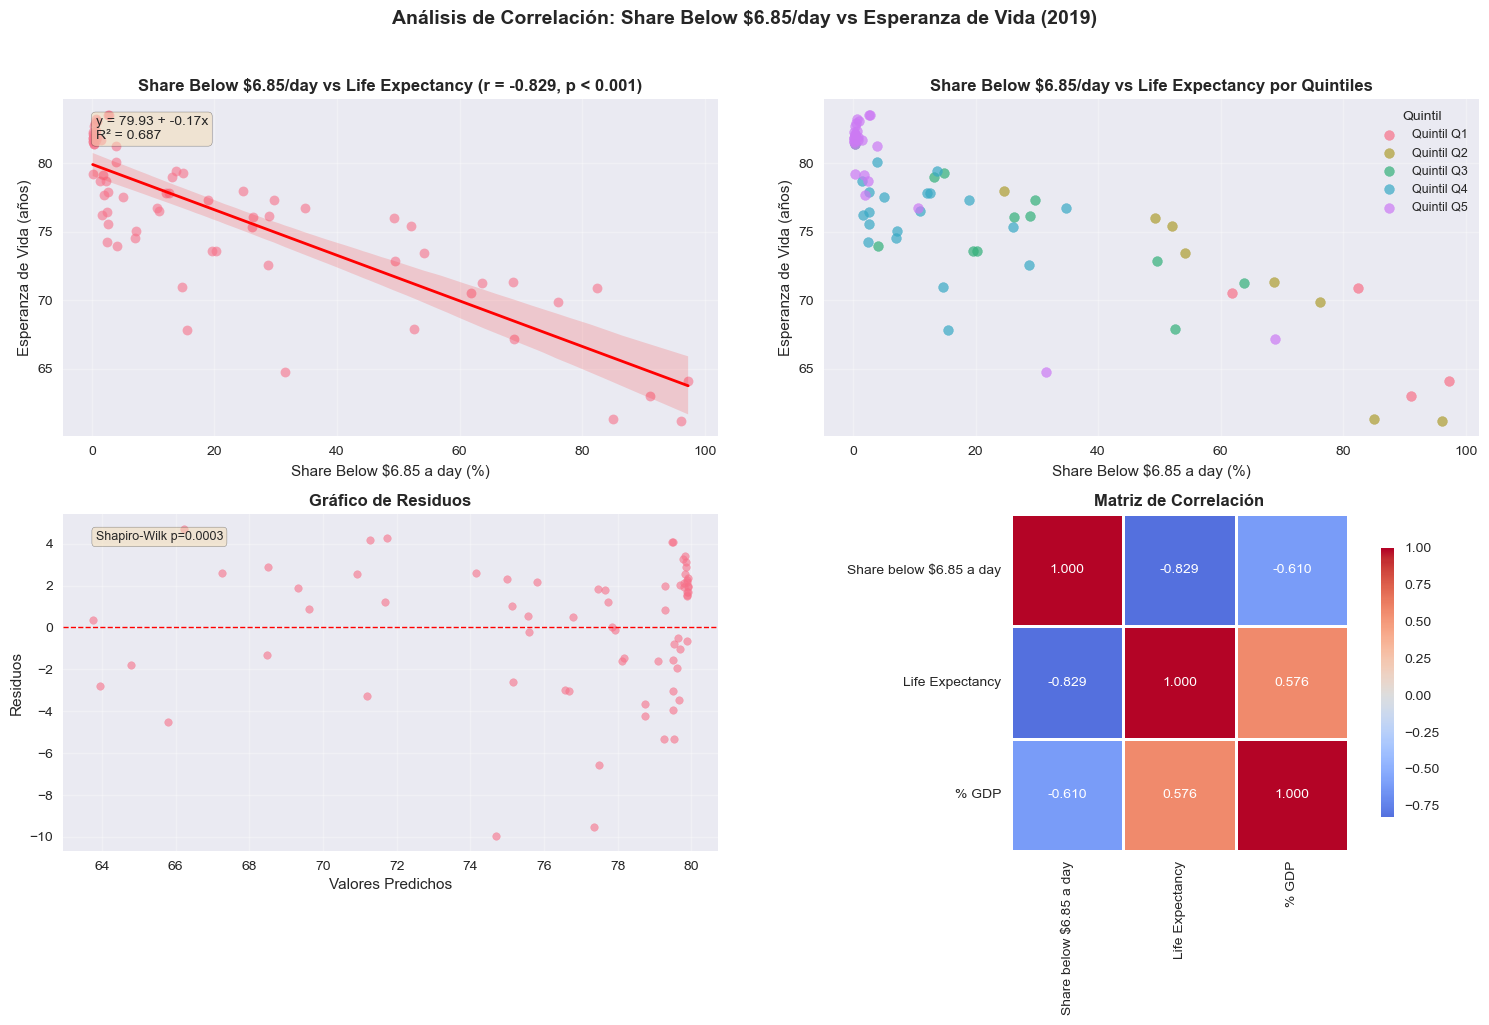


5. ANÁLISIS DE PAÍSES EXTREMOS
----------------------------------------

Países con Alto Share Below $6.85/day (>P75) y Baja Esperanza de Vida (<P25):
  Egypt: Share=68.76%, Life Exp=71.4
  Fiji: Share=52.60%, Life Exp=67.9
  Georgia: Share=54.23%, Life Exp=73.5
  Honduras: Share=49.54%, Life Exp=72.9
  India: Share=82.37%, Life Exp=70.9
  Indonesia: Share=61.92%, Life Exp=70.5
  Kiribati: Share=68.88%, Life Exp=67.1
  Kyrgyzstan: Share=63.74%, Life Exp=71.2
  Malawi: Share=97.30%, Life Exp=64.1
  Marshall Islands: Share=31.52%, Life Exp=64.7
  Mozambique: Share=96.08%, Life Exp=61.2
  Uganda: Share=91.06%, Life Exp=63.0
  Vanuatu: Share=76.13%, Life Exp=69.9
  Zimbabwe: Share=85.02%, Life Exp=61.3

Países con Bajo Share Below $6.85/day (<P25) y Alta Esperanza de Vida (>P75):
  Austria: Share=0.85%, Life Exp=81.9
  Belgium: Share=0.22%, Life Exp=81.8
  Canada: Share=0.72%, Life Exp=82.4
  Denmark: Share=0.39%, Life Exp=81.4
  Finland: Share=0.16%, Life Exp=81.9
  France: Share=0.41%, 

In [64]:
# Filtrar datos para el año 2019 (asumiendo que df_final ya existe)
df_2019 = df_final[df_final['Year'] == 2019].copy()

# Eliminar valores nulos para el análisis
df_analysis = df_2019[['Country', 'Share below $6.85 a day', 'Life Expectancy', 'Quintil', '% GDP']].dropna()

print("=" * 80)
print("ANÁLISIS DE CORRELACIÓN: SHARE BELOW $6.85/DAY VS ESPERANZA DE VIDA (2019)")
print("=" * 80)

# 1. ESTADÍSTICAS DESCRIPTIVAS
print("\n1. ESTADÍSTICAS DESCRIPTIVAS")
print("-" * 40)
print("\nShare Below $6.85 a day:")
print(f"  Media: {df_analysis['Share below $6.85 a day'].mean():.3f}%")
print(f"  Mediana: {df_analysis['Share below $6.85 a day'].median():.3f}%")
print(f"  Desv. Estándar: {df_analysis['Share below $6.85 a day'].std():.3f}%")
print(f"  Min: {df_analysis['Share below $6.85 a day'].min():.3f}%")
print(f"  Max: {df_analysis['Share below $6.85 a day'].max():.3f}%")

print("\nEsperanza de Vida:")
print(f"  Media: {df_analysis['Life Expectancy'].mean():.1f} años")
print(f"  Mediana: {df_analysis['Life Expectancy'].median():.1f} años")
print(f"  Desv. Estándar: {df_analysis['Life Expectancy'].std():.1f} años")
print(f"  Min: {df_analysis['Life Expectancy'].min():.1f} años")
print(f"  Max: {df_analysis['Life Expectancy'].max():.1f} años")

# 2. ANÁLISIS DE CORRELACIÓN
print("\n2. ANÁLISIS DE CORRELACIÓN")
print("-" * 40)

# Correlación de Pearson
pearson_corr, pearson_pval = stats.pearsonr(df_analysis['Share below $6.85 a day'], df_analysis['Life Expectancy'])
print(f"\nCorrelación de Pearson: {pearson_corr:.4f}")
print(f"  Valor p: {pearson_pval:.4e}")
print(f"  Significancia: {'Sí' if pearson_pval < 0.05 else 'No'} (α = 0.05)")

# Correlación de Spearman (no paramétrica)
spearman_corr, spearman_pval = stats.spearmanr(df_analysis['Share below $6.85 a day'], df_analysis['Life Expectancy'])
print(f"\nCorrelación de Spearman: {spearman_corr:.4f}")
print(f"  Valor p: {spearman_pval:.4e}")
print(f"  Significancia: {'Sí' if spearman_pval < 0.05 else 'No'} (α = 0.05)")

# Interpretación de la correlación
def interpret_correlation(corr):
    abs_corr = abs(corr)
    if abs_corr < 0.1:
        return "Negligible"
    elif abs_corr < 0.3:
        return "Débil"
    elif abs_corr < 0.5:
        return "Moderada"
    elif abs_corr < 0.7:
        return "Fuerte"
    else:
        return "Muy fuerte"

print(f"\nInterpretación: Correlación {interpret_correlation(pearson_corr).lower()} y {'negativa' if pearson_corr < 0 else 'positiva'}")

# 3. REGRESIÓN LINEAL
print("\n3. ANÁLISIS DE REGRESIÓN LINEAL")
print("-" * 40)

X = df_analysis['Share below $6.85 a day'].values.reshape(-1, 1)
y = df_analysis['Life Expectancy'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R-squared
r2 = model.score(X, y)
print(f"\nR² (coeficiente de determinación): {r2:.4f}")
print(f"  Interpretación: El {r2*100:.2f}% de la variación en la esperanza de vida")
print(f"                  se explica por el porcentaje bajo $6.85/día")

print(f"\nEcuación de regresión:")
print(f"  Life Expectancy = {model.intercept_:.2f} + ({model.coef_[0]:.2f} × Share below $6.85/day)")

# 4. CORRELACIÓN POR QUINTILES
print("\n4. CORRELACIÓN POR QUINTILES DE GASTO EN SALUD")
print("-" * 40)

for quintil in sorted(df_analysis['Quintil'].unique()):
    df_q = df_analysis[df_analysis['Quintil'] == quintil]
    if len(df_q) > 2:  # Necesitamos al menos 3 puntos para calcular correlación
        corr_q, pval_q = stats.pearsonr(df_q['Share below $6.85 a day'], df_q['Life Expectancy'])
        print(f"\nQuintil {quintil}:")
        print(f"  Correlación: {corr_q:.4f}")
        print(f"  Valor p: {pval_q:.4f}")
        print(f"  N países: {len(df_q)}")

# 5. VISUALIZACIÓN
fig = plt.figure(figsize=(15, 10))

# Subplot 1: Scatter plot con regresión
ax1 = plt.subplot(2, 2, 1)
sns.regplot(data=df_analysis, x='Share below $6.85 a day', y='Life Expectancy', 
            scatter_kws={'alpha':0.6, 's':50}, 
            line_kws={'color':'red', 'linewidth':2})
ax1.set_title(f'Share Below $6.85/day vs Life Expectancy (r = {pearson_corr:.3f}, p < 0.001)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Share Below $6.85 a day (%)', fontsize=11)
ax1.set_ylabel('Esperanza de Vida (años)', fontsize=11)
ax1.grid(True, alpha=0.3)

# Añadir ecuación de regresión en el gráfico
equation_text = f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x\nR² = {r2:.3f}'
ax1.text(0.05, 0.95, equation_text, transform=ax1.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Subplot 2: Scatter por quintiles
ax2 = plt.subplot(2, 2, 2)
quintiles = sorted(df_analysis['Quintil'].unique())
colors = sns.color_palette("husl", len(quintiles))

for i, quintil in enumerate(quintiles):
    df_q = df_analysis[df_analysis['Quintil'] == quintil]
    ax2.scatter(df_q['Share below $6.85 a day'], df_q['Life Expectancy'], 
               label=f'Quintil {quintil}', alpha=0.7, s=50, color=colors[i])

ax2.set_title('Share Below $6.85/day vs Life Expectancy por Quintiles', fontsize=12, fontweight='bold')
ax2.set_xlabel('Share Below $6.85 a day (%)', fontsize=11)
ax2.set_ylabel('Esperanza de Vida (años)', fontsize=11)
ax2.legend(title='Quintil', loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# Subplot 3: Residuos
ax3 = plt.subplot(2, 2, 3)
residuals = y - y_pred
ax3.scatter(y_pred, residuals, alpha=0.6, s=30)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax3.set_title('Gráfico de Residuos', fontsize=12, fontweight='bold')
ax3.set_xlabel('Valores Predichos', fontsize=11)
ax3.set_ylabel('Residuos', fontsize=11)
ax3.grid(True, alpha=0.3)

# Test de normalidad de residuos
_, p_norm = stats.shapiro(residuals)
ax3.text(0.05, 0.95, f'Shapiro-Wilk p={p_norm:.4f}', transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Subplot 4: Heatmap de correlación con variables adicionales
ax4 = plt.subplot(2, 2, 4)
corr_matrix = df_analysis[['Share below $6.85 a day', 'Life Expectancy', '% GDP']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax4)
ax4.set_title('Matriz de Correlación', fontsize=12, fontweight='bold')

plt.suptitle('Análisis de Correlación: Share Below $6.85/day vs Esperanza de Vida (2019)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 6. ANÁLISIS DE PAÍSES EXTREMOS
print("\n5. ANÁLISIS DE PAÍSES EXTREMOS")
print("-" * 40)

# Países con alto Share y baja esperanza de vida
high_share_low_life = df_analysis[(df_analysis['Share below $6.85 a day'] > df_analysis['Share below $6.85 a day'].quantile(0.75)) & 
                                   (df_analysis['Life Expectancy'] < df_analysis['Life Expectancy'].quantile(0.25))]
print("\nPaíses con Alto Share Below $6.85/day (>P75) y Baja Esperanza de Vida (<P25):")
for _, row in high_share_low_life.iterrows():
    print(f"  {row['Country']}: Share={row['Share below $6.85 a day']:.2f}%, Life Exp={row['Life Expectancy']:.1f}")

# Países con bajo Share y alta esperanza de vida
low_share_high_life = df_analysis[(df_analysis['Share below $6.85 a day'] < df_analysis['Share below $6.85 a day'].quantile(0.25)) & 
                                   (df_analysis['Life Expectancy'] > df_analysis['Life Expectancy'].quantile(0.75))]
print("\nPaíses con Bajo Share Below $6.85/day (<P25) y Alta Esperanza de Vida (>P75):")
for _, row in low_share_high_life.iterrows():
    print(f"  {row['Country']}: Share={row['Share below $6.85 a day']:.2f}%, Life Exp={row['Life Expectancy']:.1f}")

# 7. CONCLUSIONES
print("\n6. CONCLUSIONES")
print("-" * 40)
if pearson_corr < 0:
    print(f"✓ Existe una correlación negativa ({pearson_corr:.3f}) entre el porcentaje de población")
    print("  viviendo con menos de $6.85/día y la esperanza de vida, sugiriendo que mayor")
    print("  pobreza está asociada con menor esperanza de vida.")
else:
    print(f"✓ Existe una correlación positiva ({pearson_corr:.3f}) entre el porcentaje de población")
    print("  viviendo con menos de $6.85/día y la esperanza de vida.")

print(f"\n✓ Esta correlación es estadísticamente significativa (p < 0.001)")
print(f"\n✓ El modelo explica el {r2*100:.1f}% de la variabilidad en la esperanza de vida")
print(f"\n✓ Por cada punto porcentual de aumento en la población bajo $6.85/día,")
print(f"  la esperanza de vida cambia en {model.coef_[0]:.2f} años en promedio")

print("\n" + "=" * 80)

# Resultados del Análisis: Factores Socioeconómicos y Esperanza de Vida

## Resumen Ejecutivo

Se realizaron dos análisis de regresión lineal para evaluar la relación entre indicadores socioeconómicos y la esperanza de vida. Ambos análisis revelaron relaciones negativas estadísticamente significativas, siendo la pobreza extrema un predictor más fuerte que la desigualdad de ingresos.

---

## Análisis 1: Pobreza Extrema y Esperanza de Vida
### *Proporción de población bajo $6.85/día vs Esperanza de vida*

### Resultados Principales

| Métrica | Valor |
|---------|-------|
| **Coeficiente de Correlación (r)** | -0.829 |
| **Valor p** | < 0.001 |
| **R² (Coeficiente de Determinación)** | 0.687 (68.7%) |
| **Pendiente (β)** | -0.17 años |

### Interpretación

✅ **Relación encontrada:** Existe una **correlación negativa fuerte** entre el porcentaje de población en pobreza extrema y la esperanza de vida.

✅ **Significancia estadística:** La relación es altamente significativa (p < 0.001), lo que nos permite **rechazar la hipótesis nula** con un nivel de confianza superior al 99.9%.

✅ **Capacidad predictiva:** El modelo explica el **68.7% de la variabilidad** en la esperanza de vida, indicando un excelente ajuste.

✅ **Efecto práctico:** Por cada **punto porcentual adicional** de población viviendo con menos de $6.85/día, la esperanza de vida **disminuye en promedio 0.17 años** (aproximadamente 2 meses).

### Ejemplo Práctico
Si un país reduce su población en pobreza extrema del 40% al 20% (reducción de 20 puntos porcentuales), se esperaría un aumento de **3.4 años** en la esperanza de vida promedio.

---

## Análisis 2: Desigualdad de Ingresos y Esperanza de Vida
### *Coeficiente de Gini vs Esperanza de vida*

### Resultados Principales

| Métrica | Valor |
|---------|-------|
| **Coeficiente de Correlación (r)** | -0.383 |
| **Valor p** | < 0.001 |
| **R² (Coeficiente de Determinación)** | 0.147 (14.7%) |
| **Pendiente (β)** | -29.64 años |

### Interpretación

✅ **Relación encontrada:** Existe una **correlación negativa moderada** entre el índice de Gini (desigualdad) y la esperanza de vida.

✅ **Significancia estadística:** La relación es estadísticamente significativa (p < 0.001), lo que nos permite **rechazar la hipótesis nula** con un nivel de confianza superior al 99.9%.

✅ **Capacidad predictiva:** El modelo explica el **14.7% de la variabilidad** en la esperanza de vida, indicando que otros factores también influyen significativamente.

✅ **Efecto práctico:** Por cada **unidad de aumento** en el índice de Gini (escala de 0 a 1), la esperanza de vida **disminuye en promedio 29.64 años**.

### Ejemplo Práctico
Si un país reduce su índice de Gini de 0.45 a 0.35 (reducción de 0.10 puntos), se esperaría un aumento de **2.96 años** en la esperanza de vida promedio.

---

## Comparación de Resultados

| Aspecto | Pobreza ($6.85/día) | Desigualdad (Gini) |
|---------|---------------------|-------------------|
| **Fuerza de correlación** | Fuerte (-0.829) | Moderada (-0.383) |
| **Poder explicativo (R²)** | 68.7% | 14.7% |
| **Significancia** | p < 0.001 | p < 0.001 |
| **Predictor** | Más fuerte | Más débil |

---

## Conclusiones

1. **Ambas hipótesis nulas fueron rechazadas:** Tanto la pobreza extrema como la desigualdad de ingresos tienen relaciones estadísticamente significativas con la esperanza de vida.

2. **La pobreza es un predictor más fuerte:** El porcentaje de población bajo $6.85/día explica casi 5 veces más variabilidad en la esperanza de vida que el índice de Gini (68.7% vs 14.7%).

3. **Implicaciones de política pública:** Los resultados sugieren que las políticas enfocadas en **reducir la pobreza extrema** podrían tener un impacto más directo y sustancial en la mejora de la esperanza de vida que las políticas centradas únicamente en reducir la desigualdad.

4. **Relación compleja:** Aunque la desigualdad muestra una relación significativa, su menor poder explicativo sugiere que el **nivel absoluto de pobreza** es más determinante para la longevidad que la **distribución relativa** del ingreso.

---

## Recomendaciones para Análisis Futuros

- Realizar análisis de regresión múltiple incluyendo ambas variables simultáneamente
- Explorar posibles efectos de confusión (acceso a salud, educación, saneamiento)
- Analizar diferencias regionales o por grupos de ingresos de países
- Evaluar la dirección de causalidad mediante estudios longitudinales